# **Football Role Classification**

---

## **1. Project Overview**


#### **1. Project Overview**

**Dataset**: FBref Big 5 European Leagues (2017-18 to 2023-24)  
**Scope**: Outfield midfielders (MF only)   
**Task**: Classify midfielders into four tactical roles based on match statistics: Deep-Lying Playmaker (DLP), Box-to-Box (B2B), Attacking Midfielder (AM), Defensive Midfielder (DM)   
**Models**: Logistic Regression (baseline), Random Forest, XGBoost  

#### **2. Project Objective**

The objective of this project is to investigate whether tactical roles of football midfielders can be identified using event-based statistical data.
Rather than evaluating player quality or performance ranking, this study focuses on role recognition like identifying how a player contributes on the pitch based on observable actions.

The task is formulated as a multi-class classification problem, where each midfielder is assigned to one of several predefined tactical roles.

#### **3. Tactical Roles Considered**
The following four midfield roles are defined, reflecting common football analytics terminology:
1. **Defensive Midfielder (DM)** - Defensive shield, ball recovery, interception
2. **Deep-Lying Playmaker (DLP)** - Build-up distributor, tempo control, long passing
3. **Box-to-Box Midfielder (B2B)** - Balanced contribution in both attack and defense
4. **Attacking Midfielder (AM)** - Chance creation, key passes, final-third influence


#### **4. Implement Workflow**

1. **Environment Setup** - Import libraries and set configurations
1. **Data Loading & Merging** - Merge data from seven seasons and filter midfielder players.
2. **Feature Engineering** - Create relevant features based on match statistics.
3. **Exploratory Data Analysis (EDA)** - Explore feature distributions and relationships across different roles.
3. **Role Assignment:** Assign tactical roles to players based on predefined criteria using match statistics.
4. **Preprocessing** - Apply feature scaling and split the dataset into training and testing sets.
5. **Model Training** - Train baseline and ensemble models 
6. **Evaluation** - Evaluate the models using performance metrics, confusion matrices, and feature importance.


---

## **2. Implementation**

### **1. Environment Setup**

In [2]:
!pip install -r requirements.txt

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

---

### **2. Data Loading & Merging**


**Dataset Overview:**
- Source: FBref Big 5 European Leagues
- Time Period: 7 seasons from 2017-18 to 2023-24
- Leagues: Premier League, Bundesliga, La Liga, Serie A, Ligue 1

In this project, we are going to work with 7 seasons of football data. With this amount of data, it gives us enough historical data to capture different playing styles while keeping the data manageable for our models.

In [4]:
# Load all 7 seasons of data
df_1718 = pd.read_csv('datasets/cleaned_2017-18.csv')
df_1819 = pd.read_csv('datasets/cleaned_2018-19.csv')
df_1920 = pd.read_csv('datasets/cleaned_2019-20.csv')
df_2021 = pd.read_csv('datasets/cleaned_2020-21.csv')
df_2122 = pd.read_csv('datasets/cleaned_2021-22.csv')
df_2223 = pd.read_csv('datasets/cleaned_2022-23.csv')
df_2324 = pd.read_csv('datasets/cleaned_2023-24.csv')

# Concatenate all seasons
df = pd.concat([df_1718, df_1819, df_1920, df_2021, df_2122, df_2223, df_2324], 
                    ignore_index=True)

print(f"Loaded {len(df):,} player records")
print(f"Columns: {len(df.columns)}")
df.head()

Loaded 18,243 player records
Columns: 65


rk               player       nation pos           squad            comp  \
0   1  Patrick van Aanholt  Netherlands  DF  Crystal Palace  Premier League   
1   2       Rolando Aarons      England  MF   Newcastle Utd  Premier League   
2   3       Rolando Aarons      England  MF   Hellas Verona         Serie A   
3   4        Ignazio Abate        Italy  DF           Milan         Serie A   
4   5      Aymen Abdennour      Tunisia  DF       Marseille         Ligue 1   

   age  born  Matches Played  Avg Mins per Match  Goals  Assists  \
0   26  1990              28                2184      5        1   
1   21  1995               4                 139      0        0   
2   21  1995              11                 517      0        0   
3   30  1986              17                1057      1        0   
4   27  1989               8                 499      0        0   

   Goals & Assists  Non Penalty Goals  Penalty Kicks Made  Expected Goals  \
0                6                  5                   0             3.1   
1                0                  0                   0             0.1   
2                0                  0                   0             0.2   
3                1                  1                   0             0.2   
4                0                  0                   0             0.1   

   Exp NPG  Progressive Carries  Progressive Passes  Goals p 90  Assists p 90  \
0      3.1                   46                  92        0.21          0.04   
1      0.1                    7                   3        0.00          0.00   
2      0.2                    9                  17        0.00          0.00   
3      0.2                   20                  81        0.09          0.00   
4      0.1                    2                  12        0.00          0.00   

   Tackles attempted  Tackles Won  % Dribbles tackled  Shots blocked  \
0                 47           32                 0.0              5   
1                  4            4                 0.0              0   
2                 13            8                 0.0              1   
3                 20           17                 0.0              2   
4                  7            3                 0.0              5   

   Passes blocked  Interceptions  Clearances  Errors made  Goals Against  \
0              19             47          64            2              0   
1               3              1           0            0              0   
2               2              2           0            0              0   
3              20              8          29            0              0   
4               0              4          20            0              0   

   Goals against p 90  Saves  Saves %  Clean Sheets  % Clean sheets  \
0                 0.0      0      0.0             0             0.0   
1                 0.0      0      0.0             0             0.0   
2                 0.0      0      0.0             0             0.0   
3                 0.0      0      0.0             0             0.0   
4                 0.0      0      0.0             0             0.0   

   % Penalty saves  Passes Completed  Passes Attempted  Pass completion %  \
0              0.0               884              1176               75.2   
1              0.0                29                44               65.9   
2              0.0                87               120               72.5   
3              0.0               625               776               80.5   
4              0.0               310               333               93.1   

   Progressive passes distance  % Short pass completed  \
0                         6422                    90.0   
1                           77                    80.0   
2                          325                    83.3   
3                         4535                    92.9   
4                         1557                    98.4   

   % Medium passes completed  % Long pas

In [5]:
# Display column names for reference
print("All column names:")
print("-----------------\n")

for i, col in enumerate(df.columns, 1):
    print(f"{i:2}. {col}")


All column names:
-----------------

 1. rk
 2. player
 3. nation
 4. pos
 5. squad
 6. comp
 7. age
 8. born
 9. Matches Played
10. Avg Mins per Match
11. Goals
12. Assists
13. Goals & Assists
14. Non Penalty Goals
15. Penalty Kicks Made
16. Expected Goals
17. Exp NPG
18. Progressive Carries
19. Progressive Passes
20. Goals p 90
21. Assists p 90
22. Tackles attempted
23. Tackles Won
24. % Dribbles tackled
25. Shots blocked
26. Passes blocked
27. Interceptions
28. Clearances
29. Errors made
30. Goals Against
31. Goals against p 90
32. Saves
33. Saves %
34. Clean Sheets
35. % Clean sheets
36. % Penalty saves
37. Passes Completed
38. Passes Attempted
39. Pass completion %
40. Progressive passes distance
41. % Short pass completed
42. % Medium passes completed
43. % Long passes completed
44. Key passes
45. 1/3
46. Passes into penalty area
47. touches_def_pen
48. Take ons attempted
49. % Successful take-ons
50. Times tackled during take-on
51. carries_prgc
52. carries final 3rd
53. carries

**Data Filtering Approach:**

Now we need to narrow down our focus. As mentioned before, we are only focus in midfielders, so the first thing to do is filter out all non-midfielders from the dataset.

Next, we have to set a minimum threshold of 5 matches played. Players with very few matches might have unreliable statistics - a player who scored 1 goal in 1 match has a much higher "goals per 90" than a player who scored 10 goals in 30 matches, but the second player is clearly more consistent.

In [6]:
# Position filter
df_mf = df[df['pos'] == 'MF'].copy()

# Minimum matches filter
MIN_MATCHES = 5
df_mf = df_mf[df_mf['Matches Played'] >= MIN_MATCHES].copy()

print(f"Total player records before filtering: {len(df):,}")
print(f"Total midfielder records after position filtering: {len(df_mf):,}")
print(f"Total midfielder records with at least {MIN_MATCHES} matches: {len(df_mf):,}")

Total player records before filtering: 18,243
Total midfielder records after position filtering: 5,306
Total midfielder records with at least 5 matches: 5,306


---

### **3. Feature Engineering**

##### 1. **Feature Investigating**

We organize the 65 features into 8 categories based on their tactical/statistical meaning. Look at these features, we ask the fundamental question:

> *"Does this feature reflect tactical BEHAVIOR (HOW they play), or just performance/quality (HOW WELL they play)?"*

From there, we apply the feature design philosophy below:

**Keep (or engineer if needed):**
- **p90 metrics & percentages** → measure STYLE, not volume
- **Behavioral patterns** → DM (high tackles), DLP (high prog passes), AM (high key passes), B2B (balanced)

**Discard:**
- **Raw counts** → team/minutes dependent
- **Quality metrics** → reflect HOW WELL, not HOW they play
- **Meta data** → identity, not behavior


**Group 1: Identity and Playing Time (11 features)**
| # | Feature | Description | Drop | Note |
|---|---------|-------------|------|------|
| 1 | rk | Player rank/ID in dataset | ✔ | Identity feature |
| 2 | player | Player name | - | Identity feature |
| 3 | nation | Player nationality | ✔ | Identity feature |
| 4 | pos | Position (MF/FW/DF/GK) | ✔ | Identity feature |
| 5 | squad | Club/team name | - | Identity feature |
| 6 | comp | Competition/league | ✔ | Contextual feature |
| 7 | age | Player age in years | ✔ | Identity feature |
| 8 | born | Birth year | ✔ | Identity feature |
| 9 | Matches Played | Total matches appeared in | ✔ | Opportunity, not style |
| 10 | Avg Mins per Match | Average minutes played per match | - | Opportunity, not style |
| 65 | season | Season (2017-18, etc.) | - | Contextual feature |

**Note:** Since identity, contextual and opportunity features should be excluded from model training, we will **drop all** these features before modeling. This ensures that the model focuses only on performance metrics rather than player identity or external factors.

**Update 1:** I have found that "Avg Mins per Match" is actually "Minutes Played" in the dataset, so I will keep it as it helps calculate per 90 metrics and drop later.

**Update 2:** I decided to keep "player", " team", and "season" for potential future analysis or grouping, even though they are identity/contextual features. They will not be used in model training but can be useful for tracking or comparing results later on.

**Group 2: Goal Threat and Finishing (15 features)**
| # | Feature | Description | Drop | Note |
|---|---------|-------------|------|------|
| 11 | Goals | Total goals scored | ✔ | Raw count |
| 12 | Assists | Total assists provided | ✔ | Raw count |
| 13 | Goals & Assists | Total G+A | ✔ | Raw count |
| 14 | Non Penalty Goals | Goals excluding penalties | ✔ | Raw count |
| 15 | Penalty Kicks Made | Penalties scored | ✔ | Situational |
| 16 | Expected Goals | Expected goals based on shot quality | - | Raw count, use for later calculations |
| 17 | Exp NPG | Expected non-penalty goals | ✔ | Raw count |
| 20 | Goals p 90 | Goals per 90 minutes |  | AM/B2B output |
| 21 | Assists p 90 | Assists per 90 minutes |  | AM signature |
| 55 | Goals Scored | Total goals | ✔ | Raw count, duplicate of #11 |
| 56 | Total Shots | Total shots taken | ✔ | Raw count |
| 57 | % Shots on target | Shot accuracy | ✔ | Quality metric |
| 58 | Shots p 90 | Shots per 90 minutes |  | Shooting behavior |
| 59 | Goals per shot | Conversion rate | ✔ | Quality metric |
| 60 | Goals per shot on target | Finishing efficiency | ✔ | Quality metric |

**Note:** As raw counts and quality metrics may depend on playing time and the quality of the team, we will drop these features. Instead, we will keep per 90 metrics features that gives the better insight. For example, a substitute midfielder who plays 20 minutes and scores 1 goal has a much higher "goals per 90" than a regular starter who plays 90 minutes and scores 1 goal, so "goals per 90" better captures scoring ability independent of playing time.

**Group 3: Defensive Actions (9 features)**
| # | Feature | Description | Drop | Note |
|---|---------|-------------|------|------|
| 22 | Tackles attempted | Total tackles tried (successful + failed) | - | Raw count, use for later calculations |
| 23 | Tackles Won | Successful tackles | ✔ | Quality metric |
| 24 | % Dribbles tackled | Success rate of tackles on dribbles | ✔ | Quality metric |
| 25 | Shots blocked | Shots blocked by player | - | Raw count, use for later calculations|
| 26 | Passes blocked | Passes intercepted in flight | - | Raw count, use for later calculations |
| 27 | Interceptions | Passes cut out | - | Raw count, use for later calculations|
| 28 | Clearances | Balls cleared from danger | - | Raw count, use for later calculations|
| 47 | touches_def_pen | Touches in defensive penalty area | - | Raw count, use for later calculations |
| 64 | Crosses Stopped | Crosses blocked (defensive) | ✔ | More FB behavior |


**Group 4: Passing Volume and Distribution (11 features)**
| # | Feature | Description | Drop | Note |
|---|---------|-------------|------|------|
| 19 | Progressive Passes | Passes that move ball ≥10 yards toward goal | - | Raw count, use for later calculations |
| 37 | Passes Completed | Total successful passes | ✔ | Duplicate of #39 |
| 38 | Passes Attempted | Total passes tried | - | Raw count, use for later calculations |
| 39 | Pass completion % | % of passes completed | | The safety of attempted passes |
| 40 | Progressive passes distance | Total distance of progressive passes | - | Raw count, use for later calculations |
| 41 | % Short pass completed | Success rate for short passes (<15 yards) | ✔ | Granular, team bias |
| 42 | % Medium passes completed | Success rate for medium passes (15-30 yards) | ✔ | Granular, team bias |
| 43 | % Long passes completed | Success rate for long passes (>30 yards) | ✔ | Granular, team bias |
| 44 | Key passes | Passes leading to shots | - | Raw count, use for later calculations |
| 45 | 1/3 | Passes into final third | - | Attacking action, raw count - use for later calculations|
| 46 | Passes into penalty area | Passes into the box |  - | Attacking action, raw count - use for later calculations|


**Group 5: Ball Progression and Carrying (7 features)**
| # | Feature | Description | Drop | Note |
|---|---------|-------------|------|------|
| 18 | Progressive Carries | Carries that move ball ≥10 yards toward goal | - | Raw count, use for later calculations |
| 48 | Take ons attempted | Total dribbles attempted | - | Raw count, use for later calculations |
| 49 | % Successful take-ons | Dribble success rate | ✔ | Quality metric |
| 50 | Times tackled during take-on | Failed dribbles | ✔ | Quality metric |
| 51 | carries_prgc | Progressive carries (duplicate of #18) | ✔ | Duplicate |
| 52 | carries final 3rd | Carries into attacking third | - | Raw count, use for later calculations |
| 53 | carries penalty area | Carries into the box | - | Raw count, use for later calculations |

**Group 6: Creativity and Chance Creation (2 features)**
| # | Feature | Description | Drop | Note |
|---|---------|-------------|------|------|
| 62 | Shot creating actions p 90 | Actions leading to shots per 90 |  | AM creativity |
| 63 | Goal creating actions p 90 | Actions leading to goals per 90 | ✔ | Quality metric |


**Group 7: Goalkeeper Statistics (7 features)**
| # | Feature | Description | Drop | Note |
|---|---------|-------------|------|------|
| 30 | Goals Against | Goals conceded (GK stat) | ✔ | Irrelevant for MF |
| 31 | Goals against p 90 | GA per 90 (GK stat) | ✔ | Irrelevant for MF |
| 32 | Saves | Saves made (GK stat) | ✔ | Irrelevant for MF |
| 33 | Saves % | Save percentage (GK stat) | ✔ | Irrelevant for MF |
| 34 | Clean Sheets | Matches without conceding | ✔ | Team stat |
| 35 | % Clean sheets | Clean sheet percentage | ✔ | Team stat |
| 36 | % Penalty saves | Penalty save rate (GK stat) | ✔ | Irrelevant for MF |

**Group 8: Other (3 feature)**
| # | Feature | Description | Drop | Note |
|---|---------|-------------|------|------|
| 29 | Errors made | Errors leading to shots/goals | ✔ | Negative quality metric |
| 54 | Possessions lost | Times lost the ball | ✔ | Quality metric |
| 61 | % Aerial Duels won | Aerial duel success rate | ✔ | Physical attribute |

##### **2. Feature Engineering**


At previous step, we have investigated all 65 features and decided which to keep or drop or engineer. Next, we will follow this flow:
1. Drop unnecessary features, keep needed raw metrics, rename some columns
2. Engineer p90 metrics from raw counts
3. Drop raw metrics after engineering

In [7]:
# Drop unnecessary features, keep needed raw metrics, rename some columns
selected_columns = [
    # Group 1
    'player', 'squad', 'Avg Mins per Match', 'season',
    
    # Group 2
    'Expected Goals', 
    'Goals p 90', 'Assists p 90', 'Shots p 90',

    # Group 3
    'Tackles attempted', 'Shots blocked', 'Passes blocked', 'Interceptions', 'Clearances', 'touches_def_pen',

    # Group 4
    'Progressive Passes', 'Passes Attempted', 'Progressive passes distance', 'Key passes', '1/3', 'Passes into penalty area',
    'Pass completion %', 

    # Group 5
    'Progressive Carries', 'Take ons attempted', 'carries final 3rd', 'carries penalty area',

    # Group 6
    'Shot creating actions p 90'
]

df_selected = df_mf.loc[:, selected_columns]
print(f"Dropped {len(df_mf.columns) - len(df_selected.columns)} columns.")

Dropped 39 columns.


In [8]:
df_selected.rename(columns={
    'player': 'player_name',
    'squad': 'team',
    'Avg Mins per Match': 'minutes_played',
    'Expected Goals': 'xG',
    'Goals p 90': 'goals_p90',
    'Assists p 90': 'assists_p90',
    'Shots p 90': 'shots_p90',
    'Tackles attempted': 'tackles_attempted',
    'Shots blocked': 'shots_blocked',
    'Passes blocked': 'passes_blocked',
    'Interceptions': 'interceptions',
    'Clearances': 'clearances',
    'touches_def_pen': 'touches_in_def_penalty_area',
    'Progressive Passes': 'progressive_passes',
    'Passes Attempted': 'passes_attempted',
    'Progressive passes distance': 'progressive_pass_distance',
    'Key passes': 'key_passes',
    '1/3': 'passes_into_final_third',
    'Passes into penalty area': 'passes_into_penalty_area',
    'Pass completion %': 'pass_completion_pct',
    'Progressive Carries': 'progressive_carries',
    'Take ons attempted': 'dribbles_attempted',
    'carries final 3rd': 'carries_into_final_third',
    'carries penalty area': 'carries_into_penalty_area',
    'Shot creating actions p 90': 'shot_creating_actions_p90'
}, inplace=True)

df_selected.head()

player_name           team  minutes_played     season   xG  goals_p90  \
2   Rolando Aarons  Hellas Verona             517  2017-2018  0.2       0.00   
6      Mehdi Abeid          Dijon            1176  2017-2018  1.0       0.00   
9     Amir Abrashi       Freiburg             850  2017-2018  0.2       0.00   
11  Afriyie Acquah         Torino             951  2017-2018  0.4       0.09   
12    Charlie Adam     Stoke City             411  2017-2018  1.6       0.00   

    assists_p90  shots_p90  tackles_attempted  shots_blocked  passes_blocked  \
2          0.00       0.00                 13              1               2   
6          0.08       0.46                 23              6               5   
9          0.00       0.00                 35              5              17   
11         0.00       0.28                  8              1               7   
12         0.00       0.44                  9              0               2   

    interceptions  clearances  touches_in_def_penalty_area  \
2               2           0                            3   
6              18          25                           30   
9              19          20                           23   
11             16          10                            8   
12              9          11                            9   

    progressive_passes  passes_attempted  progressive_pass_distance  \
2                   17               120                        325   
6                   49               605                       2345   
9                   38               321                       1126   
11                  60               478                       1627   
12                  30               285                       1505   

    key_passes  passes_into_final_third  passes_into_penalty_area  \
2            3                        8                         7   
6            7                       33                         1   
9            3                       22                         6   
11           6                       38                         2   
12           6                       28                         7   

    pass_completion_pct  progressive_carries  dribbles_attempted  \
2                  72.5                    9                  15   
6                  84.8                   20                  20   
9                  77.3                    8                   5   
11                 84.7                   24                  24   
12                 58.9                    6                  12   

    carries_into_final_third  carries_into_penalty_area  \
2                         11                          2   
6                         13                          0   
9                          7                          1   
11                        18                          2   
12                        15                          2   

    shot_creating_actions_p90  
2                        0.87  
6                        1.46  
9                        1.48  
11                       1.63  
12                       3.72

In [9]:
# Engineer p90 metrics from raw counts
df_selected['xG_p90'] = (df_selected['xG'] / df_selected['minutes_played']) * 90
df_selected['tackles_attempted_p90'] = (df_selected['tackles_attempted'] / df_selected['minutes_played']) * 90
df_selected['shots_blocked_p90'] = (df_selected['shots_blocked'] / df_selected['minutes_played']) * 90
df_selected['passes_blocked_p90'] = (df_selected['passes_blocked'] / df_selected['minutes_played']) * 90
df_selected['interceptions_p90'] = (df_selected['interceptions'] / df_selected['minutes_played']) * 90
df_selected['clearances_p90'] = (df_selected['clearances'] / df_selected['minutes_played']) * 90
df_selected['touches_in_def_penalty_area_p90'] = (df_selected['touches_in_def_penalty_area'] / df_selected['minutes_played']) * 90
df_selected['progressive_passes_p90'] = (df_selected['progressive_passes'] / df_selected['minutes_played']) * 90
df_selected['passes_attempted_p90'] = (df_selected['passes_attempted'] / df_selected['minutes_played']) * 90
df_selected['progressive_pass_distance_p90'] = (df_selected['progressive_pass_distance'] / df_selected['minutes_played']) * 90
df_selected['key_passes_p90'] = (df_selected['key_passes'] / df_selected['minutes_played']) * 90
df_selected['passes_into_final_third_p90'] = (df_selected['passes_into_final_third'] / df_selected['minutes_played']) * 90
df_selected['passes_into_penalty_area_p90'] = (df_selected['passes_into_penalty_area'] / df_selected['minutes_played']) * 90
df_selected['progressive_carries_p90'] = (df_selected['progressive_carries'] / df_selected['minutes_played']) * 90
df_selected['dribbles_attempted_p90'] = (df_selected['dribbles_attempted'] / df_selected['minutes_played']) * 90
df_selected['carries_into_final_third_p90'] = (df_selected['carries_into_final_third'] / df_selected['minutes_played']) * 90
df_selected['carries_into_penalty_area_p90'] = (df_selected['carries_into_penalty_area'] / df_selected['minutes_played']) * 90

print("Added 17 columns")

Added 17 columns


In [10]:
# Drop raw metrics after engineering
drop_features = [
    'xG',
    'tackles_attempted',
    'shots_blocked',
    'passes_blocked',
    'interceptions',
    'clearances',
    'touches_in_def_penalty_area',
    'progressive_passes',
    'passes_attempted',
    'progressive_pass_distance',
    'key_passes',
    'passes_into_final_third',
    'passes_into_penalty_area',
    'progressive_carries',
    'dribbles_attempted',
    'carries_into_final_third',
    'carries_into_penalty_area'
]

df_selected = df_selected.drop(columns=drop_features)
print(f"Dropped {len(drop_features)} raw metric columns.")
print(f"Columns: {len(df_selected.columns)}")
df_selected.head()

Dropped 17 raw metric columns.
Columns: 26


player_name           team  minutes_played     season  goals_p90  \
2   Rolando Aarons  Hellas Verona             517  2017-2018       0.00   
6      Mehdi Abeid          Dijon            1176  2017-2018       0.00   
9     Amir Abrashi       Freiburg             850  2017-2018       0.00   
11  Afriyie Acquah         Torino             951  2017-2018       0.09   
12    Charlie Adam     Stoke City             411  2017-2018       0.00   

    assists_p90  shots_p90  pass_completion_pct  shot_creating_actions_p90  \
2          0.00       0.00                 72.5                       0.87   
6          0.08       0.46                 84.8                       1.46   
9          0.00       0.00                 77.3                       1.48   
11         0.00       0.28                 84.7                       1.63   
12         0.00       0.44                 58.9                       3.72   

      xG_p90  tackles_attempted_p90  shots_blocked_p90  passes_blocked_p90  \
2   0.034816               2.263056           0.174081            0.348162   
6   0.076531               1.760204           0.459184            0.382653   
9   0.021176               3.705882           0.529412            1.800000   
11  0.037855               0.757098           0.094637            0.662461   
12  0.350365               1.970803           0.000000            0.437956   

    interceptions_p90  clearances_p90  touches_in_def_penalty_area_p90  \
2            0.348162        0.000000                         0.522244   
6            1.377551        1.913265                         2.295918   
9            2.011765        2.117647                         2.435294   
11           1.514196        0.946372                         0.757098   
12           1.970803        2.408759                         1.970803   

    progressive_passes_p90  passes_attempted_p90  \
2                 2.959381             20.889749   
6                 3.750000             46.301020   
9                 4.023529             33.988235   
11                5.678233             45.236593   
12                6.569343             62.408759   

    progressive_pass_distance_p90  key_passes_p90  \
2                       56.576402        0.522244   
6                      179.464286        0.535714   
9                      119.223529        0.317647   
11                     153.974763        0.567823   
12                     329.562044        1.313869   

    passes_into_final_third_p90  passes_into_penalty_area_p90  \
2                      1.392650                      1.218569   
6                      2.525510                      0.076531   
9                      2.329412                      0.635294   
11                     3.596215                      0.189274   
12                     6.131387                      1.532847   

    progressive_carries_p90  dribbles_attempted_p90  \
2                  1.566731                2.611219   
6                  1.530612                1.530612   
9                  0.847059                0.529412   
11                 2.271293                2.271293   
12                 1.313869                2.627737   

    carries_into_final_third_p90  carries_into_penalty_area_p90  
2                       1.914894                       0.348162  
6                       0.994898                       0.000000  
9                       0.741176                       0.105882  
11                      1.703470                       0.189274  
12                      3.284672                       0.437956

In [11]:
# Display column names 
print("All column names:")
print("-----------------\n")

for i, col in enumerate(df_selected.columns):
    print(f"{i:2}. {col}")

All column names:
-----------------

 0. player_name
 1. team
 2. minutes_played
 3. season
 4. goals_p90
 5. assists_p90
 6. shots_p90
 7. pass_completion_pct
 8. shot_creating_actions_p90
 9. xG_p90
10. tackles_attempted_p90
11. shots_blocked_p90
12. passes_blocked_p90
13. interceptions_p90
14. clearances_p90
15. touches_in_def_penalty_area_p90
16. progressive_passes_p90
17. passes_attempted_p90
18. progressive_pass_distance_p90
19. key_passes_p90
20. passes_into_final_third_p90
21. passes_into_penalty_area_p90
22. progressive_carries_p90
23. dribbles_attempted_p90
24. carries_into_final_third_p90
25. carries_into_penalty_area_p90


##### **3. Final Features List**

Again, we will group the final selected features into categories for better analysis:

**Group 0: Metadata (4 features)**
*(Not used for learning player style directly)*

| # | Feature | Description |
|---|---------|-------------|
| 0 | player_name | Player name |
| 1 | team | Club/team name |
| 2 | minutes_played | Total minutes played |
| 3 | season | Season identifier |

**Group 1: Attacking Actions (7 features)**

| # | Feature | Description |
|---|---------|-------------|
| 4 | goals_p90 | Goals scored per 90 minutes |
| 5 | assists_p90 | Assists per 90 minutes |
| 6 | shots_p90 | Shots taken per 90 minutes |
| 9 | xG_p90 | Expected goals per 90 minutes |
| 8 | shot_creating_actions_p90 | Actions leading to a shot per 90 |
| 19 | key_passes_p90 | Passes leading directly to a shot |
| 21 | passes_into_penalty_area_p90 | Passes into the penalty area |

**Group 2: Passing & Ball Progression (5 features)**

| # | Feature | Description |
|---|---------|-------------|
| 7 | pass_completion_pct | Overall pass completion percentage |
| 17 | passes_attempted_p90 | Total passes attempted per 90 |
| 16 | progressive_passes_p90 | Forward passes that advance the ball |
| 18 | progressive_pass_distance_p90 | Total distance of progressive passes |
| 20 | passes_into_final_third_p90 | Passes into the final third |


**Group 3: Ball Carrying & Dribbling (4 features)**
*(Progression via movement with the ball)*

| # | Feature | Description |
|---|---------|-------------|
| 22 | progressive_carries_p90 | Carries that advance the ball forward |
| 23 | dribbles_attempted_p90 | Dribbles attempted per 90 |
| 24 | carries_into_final_third_p90 | Carries into the final third |
| 25 | carries_into_penalty_area_p90 | Carries into the penalty area |

**Group 4: Defensive Actions (6 features)**
*(Defensive actions and disruption)*

| # | Feature | Description |
|---|---------|-------------|
| 10 | tackles_attempted_p90 | Tackles attempted per 90 |
| 13 | interceptions_p90 | Interceptions per 90 |
| 11 | shots_blocked_p90 | Opponent shots blocked |
| 12 | passes_blocked_p90 | Opponent passes blocked |
| 14 | clearances_p90 | Clearances per 90 |
| 15 | touches_in_def_penalty_area_p90 | Touches inside own penalty area |

---

### **4. Exploratory Data Analysis (EDA)**

**EDA Purpose:**

Understand our data through visualization before modeling. We need to:
1. Check data quality (missing values, data types)
2. Understand feature distributions
3. Identify relationships between features

In [12]:
# Data Quality Assessment
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5306 entries, 2 to 18242
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   player_name                      5306 non-null   object 
 1   team                             5306 non-null   object 
 2   minutes_played                   5306 non-null   int64  
 3   season                           5306 non-null   object 
 4   goals_p90                        5306 non-null   float64
 5   assists_p90                      5306 non-null   float64
 6   shots_p90                        5306 non-null   float64
 7   pass_completion_pct              5306 non-null   float64
 8   shot_creating_actions_p90        5306 non-null   float64
 9   xG_p90                           5306 non-null   float64
 10  tackles_attempted_p90            5306 non-null   float64
 11  shots_blocked_p90                5306 non-null   float64
 12  passes_blocked_p90      

##### **1. Data Quality Checks**

**Decision Rationale:**

Before analyzing role patterns, we must verify data integrity. Missing values or data type issues can silently corrupt our analysis. Since we engineered 17 new p90 metrics through division operations, we need to check for:

- **Division by zero errors** (if any player has 0 minutes somehow)
- **NaN/Inf values** from calculations
- **Data type consistency** (all numeric features should be float/int)


In [13]:
# Missing values check
print("Missing Values:")
print(df_selected.isnull().sum())

Missing Values:
player_name                        0
team                               0
minutes_played                     0
season                             0
goals_p90                          0
assists_p90                        0
shots_p90                          0
pass_completion_pct                0
shot_creating_actions_p90          0
xG_p90                             0
tackles_attempted_p90              0
shots_blocked_p90                  0
passes_blocked_p90                 0
interceptions_p90                  0
clearances_p90                     0
touches_in_def_penalty_area_p90    0
progressive_passes_p90             0
passes_attempted_p90               0
progressive_pass_distance_p90      0
key_passes_p90                     0
passes_into_final_third_p90        0
passes_into_penalty_area_p90       0
progressive_carries_p90            0
dribbles_attempted_p90             0
carries_into_final_third_p90       0
carries_into_penalty_area_p90      0
dtype: int64


In [14]:
# Infinite values check
print("Infinite Values:")

print(df_selected.isin([np.inf, -np.inf]).sum())

Infinite Values:
player_name                        0
team                               0
minutes_played                     0
season                             0
goals_p90                          0
assists_p90                        0
shots_p90                          0
pass_completion_pct                0
shot_creating_actions_p90          0
xG_p90                             0
tackles_attempted_p90              0
shots_blocked_p90                  0
passes_blocked_p90                 0
interceptions_p90                  0
clearances_p90                     0
touches_in_def_penalty_area_p90    0
progressive_passes_p90             0
passes_attempted_p90               0
progressive_pass_distance_p90      0
key_passes_p90                     0
passes_into_final_third_p90        0
passes_into_penalty_area_p90       0
progressive_carries_p90            0
dribbles_attempted_p90             0
carries_into_final_third_p90       0
carries_into_penalty_area_p90      0
dtype: int64


In [15]:
# Data type check
print("\nData Types:")
print(df_selected.dtypes)
print(df_selected.dtypes.value_counts())


Data Types:
player_name                         object
team                                object
minutes_played                       int64
season                              object
goals_p90                          float64
assists_p90                        float64
shots_p90                          float64
pass_completion_pct                float64
shot_creating_actions_p90          float64
xG_p90                             float64
tackles_attempted_p90              float64
shots_blocked_p90                  float64
passes_blocked_p90                 float64
interceptions_p90                  float64
clearances_p90                     float64
touches_in_def_penalty_area_p90    float64
progressive_passes_p90             float64
passes_attempted_p90               float64
progressive_pass_distance_p90      float64
key_passes_p90                     float64
passes_into_final_third_p90        float64
passes_into_penalty_area_p90       float64
progressive_carries_p90            float6

##### **2. Feature Distribution Analysis**

**Strategy:** For each feature group, we visualize the distribution using a **Kernel Density Estimate (KDE) plot**.
This helps us:
- Clearly see the distribution shape (skewed, normal, etc.)
- Identify the median, top 25%, and top 10% (using median, 75th, 90th percentiles)
- Spot outstanding players (positive outliers)

**Group 1: Attacking Actions**

**Features:** Goals, Assists, Shots, xG, Shot Creating Actions, Key Passes, Passes into Penalty Area (all per 90)

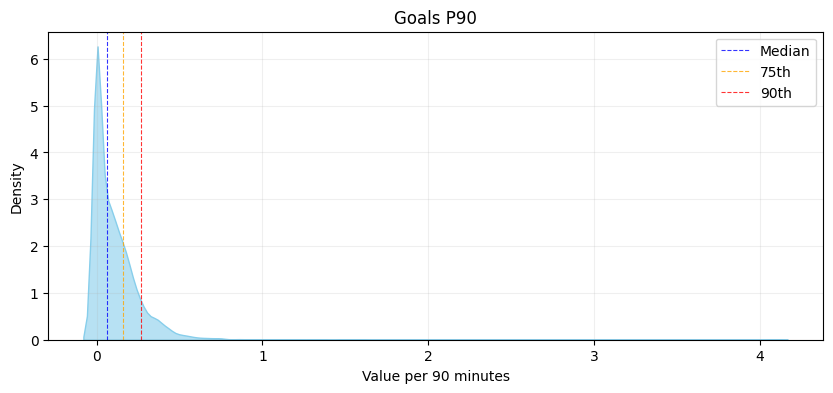

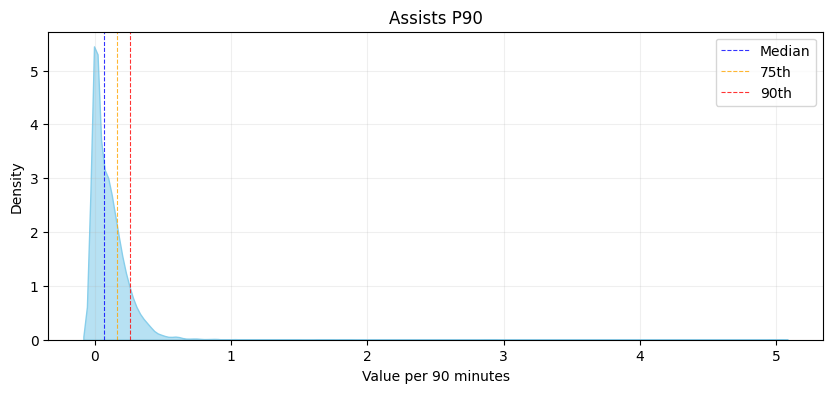

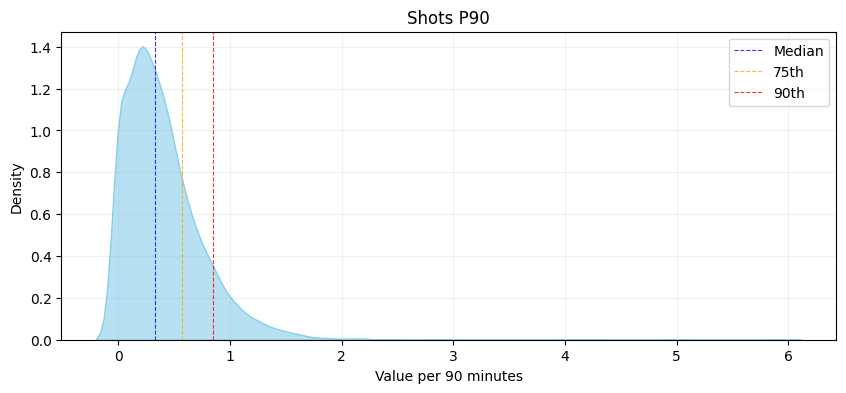

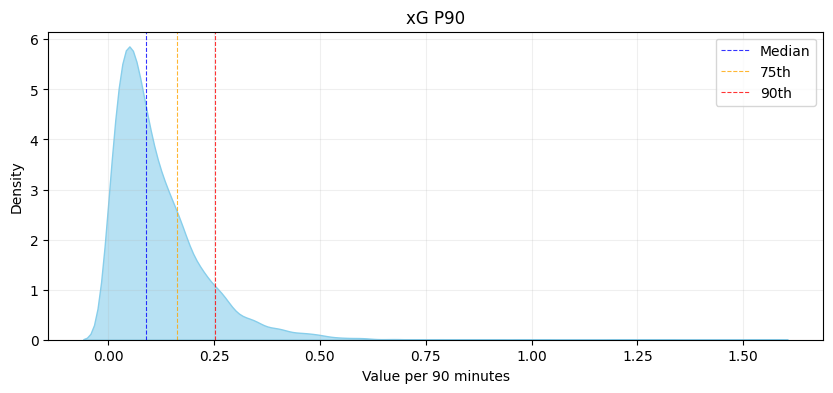

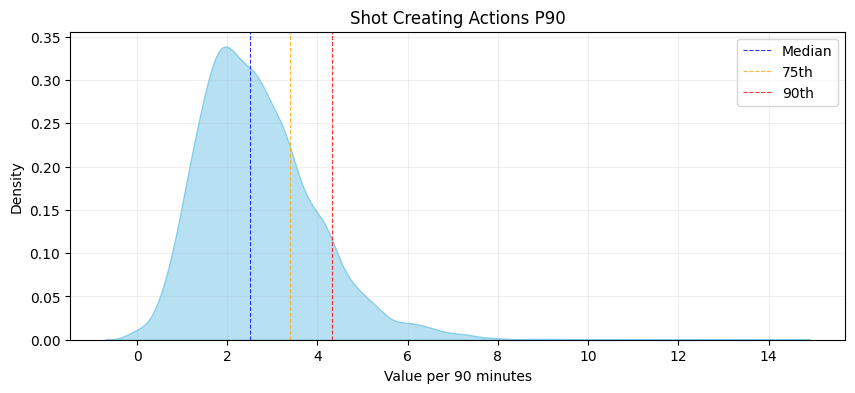

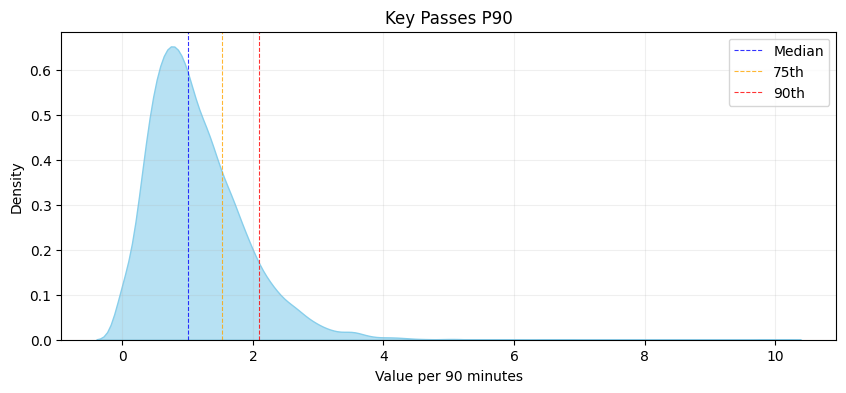

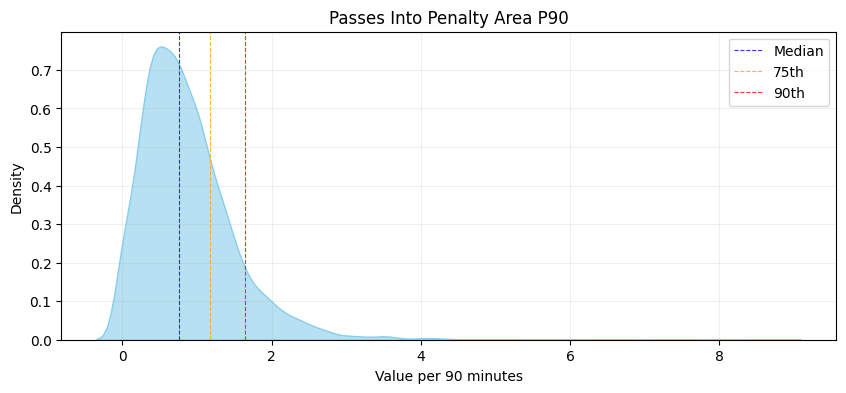

In [16]:
attacking_features = ['goals_p90', 'assists_p90', 'shots_p90', 'xG_p90', 'shot_creating_actions_p90', 
                      'key_passes_p90', 'passes_into_penalty_area_p90']

for feature in attacking_features:
    plt.figure(figsize=(10, 4))
    plt.title(feature.title().replace('_', ' '))
    if feature == 'xG_p90':
        plt.title('xG P90')
    plt.xlabel('Value per 90 minutes')
    plt.ylabel('Density')

    sns.kdeplot(data=df_selected, x=feature, fill=True, color='skyblue', alpha=0.6)
    plt.axvline(df_selected[feature].median(), color='blue', linestyle='--', label='Median', linewidth=0.8, alpha=0.8)
    plt.axvline(df_selected[feature].quantile(0.75), color='orange', linestyle='--', label='75th', linewidth=0.8, alpha=0.8)
    plt.axvline(df_selected[feature].quantile(0.90), color='red', linestyle='--', label='90th', linewidth=0.8, alpha=0.8)

    plt.legend()
    plt.grid(alpha=0.2)
    plt.show()

**Group 2: Defensive Actions**

**Features:** Tackles, Interceptions, Blocks (shots/passes), Clearances, Defensive Touches (all per 90)

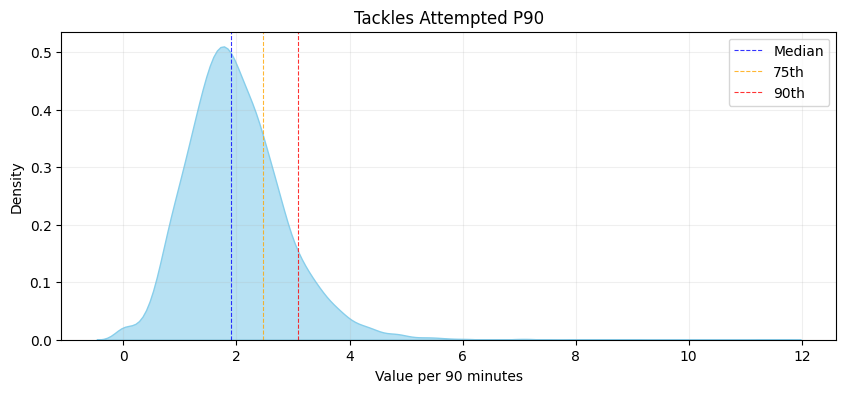

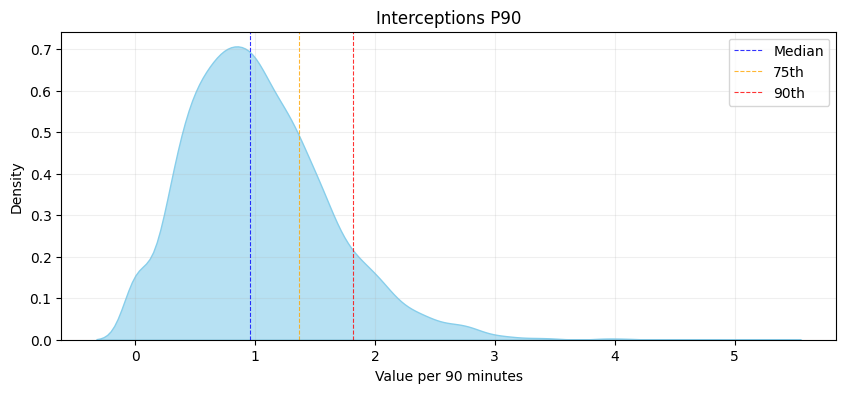

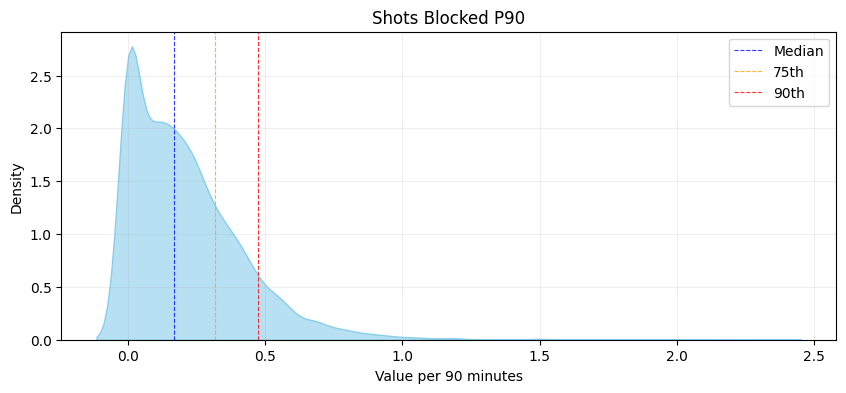

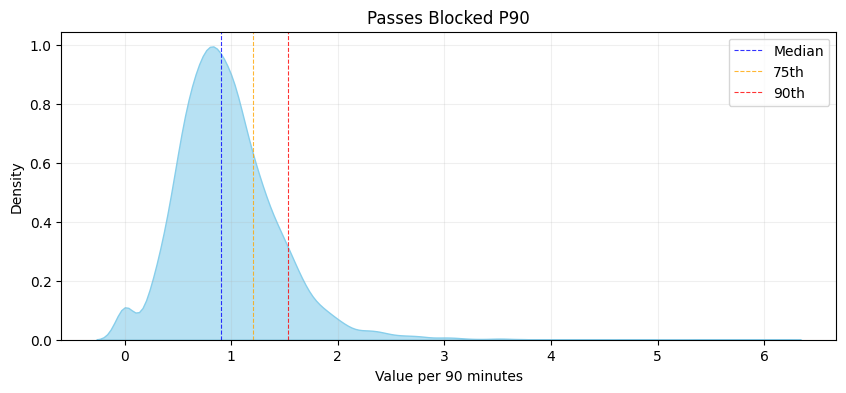

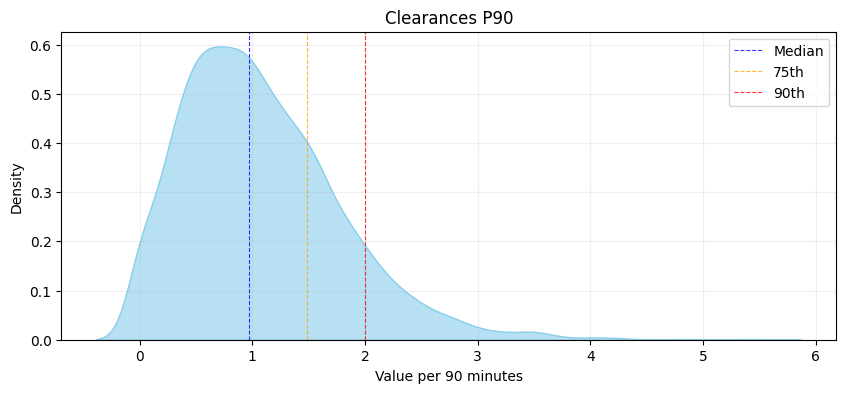

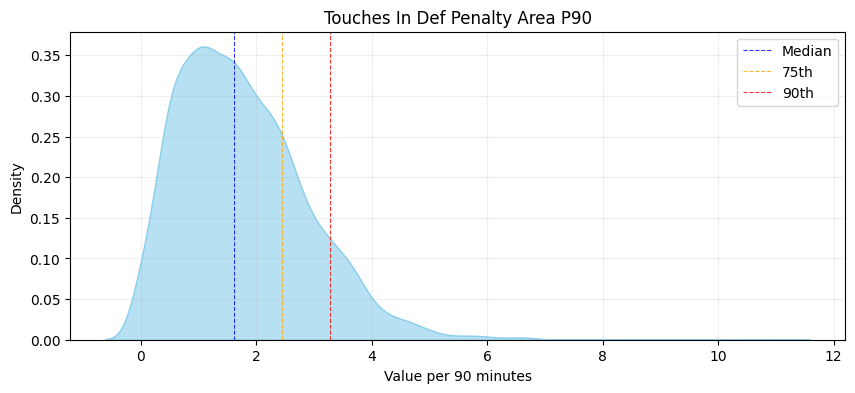

In [17]:
defensive_features = ['tackles_attempted_p90', 'interceptions_p90', 'shots_blocked_p90', 
                      'passes_blocked_p90', 'clearances_p90', 'touches_in_def_penalty_area_p90']

for feature in defensive_features:
    plt.figure(figsize=(10, 4))
    plt.title(feature.title().replace('_', ' '))
    plt.xlabel('Value per 90 minutes')
    plt.ylabel('Density')

    sns.kdeplot(data=df_selected, x=feature, fill=True, color='skyblue', alpha=0.6)
    plt.axvline(df_selected[feature].median(), color='blue', linestyle='--', label='Median', linewidth=0.8, alpha=0.8)
    plt.axvline(df_selected[feature].quantile(0.75), color='orange', linestyle='--', label='75th', linewidth=0.8, alpha=0.8)
    plt.axvline(df_selected[feature].quantile(0.90), color='red', linestyle='--', label='90th', linewidth=0.8, alpha=0.8)

    plt.legend()
    plt.grid(alpha=0.2)
    plt.show()

**Group 3: Passing & Ball Progression**

**Features:** Pass Completion %, Passes Attempted, Progressive Passes, Pass Distance, Passes into Final Third (all per 90)

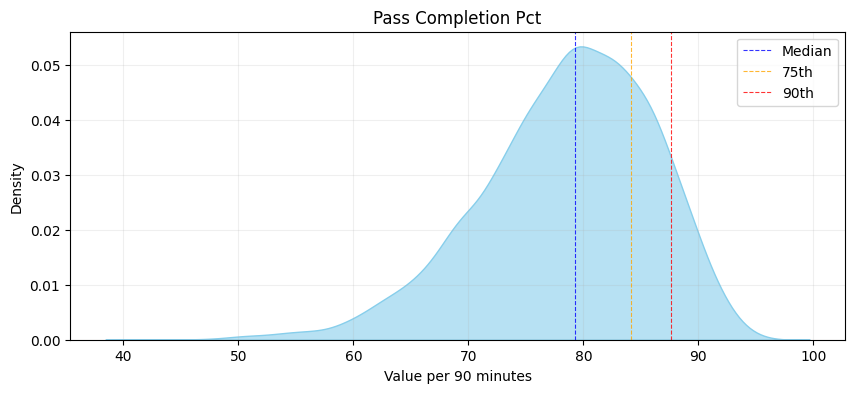

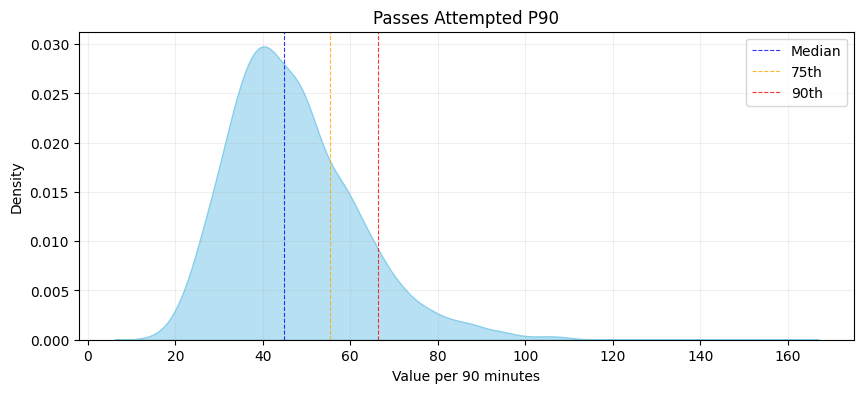

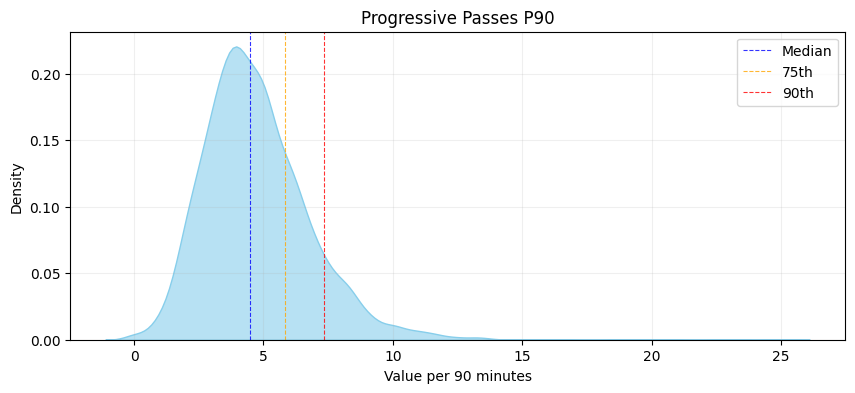

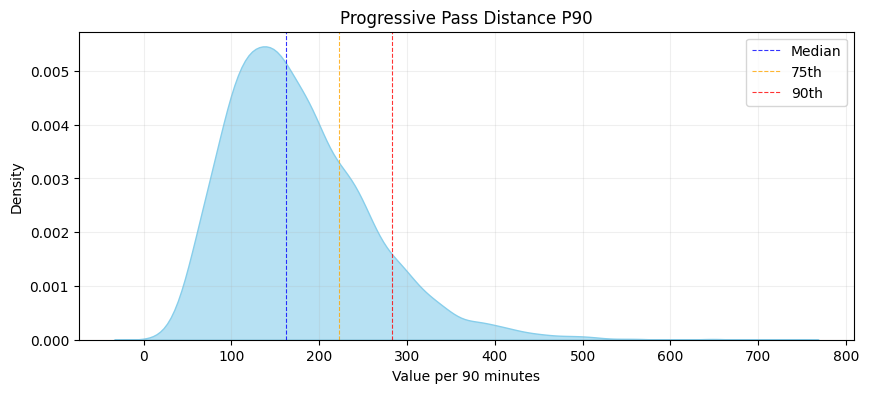

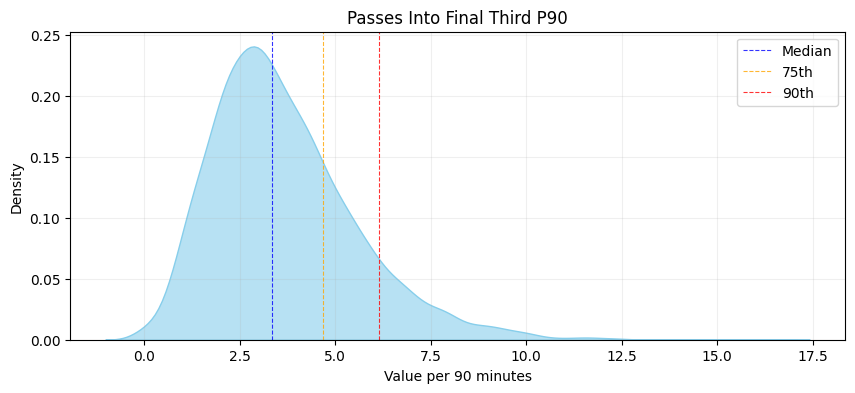

In [18]:
passing_features = ['pass_completion_pct', 'passes_attempted_p90', 'progressive_passes_p90', 
                    'progressive_pass_distance_p90', 'passes_into_final_third_p90']

for feature in passing_features:
    plt.figure(figsize=(10, 4))
    plt.title(feature.title().replace('_', ' '))
    plt.xlabel('Value per 90 minutes')
    plt.ylabel('Density')

    sns.kdeplot(data=df_selected, x=feature, fill=True, color='skyblue', alpha=0.6)
    plt.axvline(df_selected[feature].median(), color='blue', linestyle='--', label='Median', linewidth=0.8, alpha=0.8)
    plt.axvline(df_selected[feature].quantile(0.75), color='orange', linestyle='--', label='75th', linewidth=0.8, alpha=0.8)
    plt.axvline(df_selected[feature].quantile(0.90), color='red', linestyle='--', label='90th', linewidth=0.8, alpha=0.8)

    plt.legend()
    plt.grid(alpha=0.2)
    plt.show()

**Group 4: Ball Carrying & Dribbling**

**Features:** Progressive Carries, Dribbles Attempted, Carries into Final Third, Carries into Penalty Area (all per 90)

**What to look for:** Ball carriers who drive forward vs static passers?

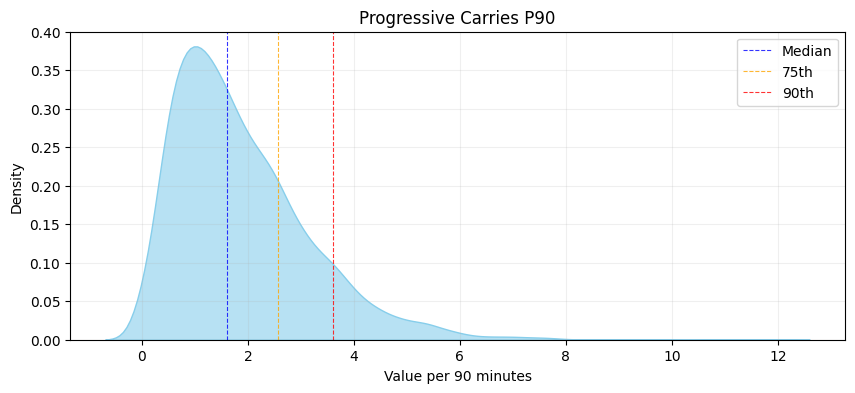

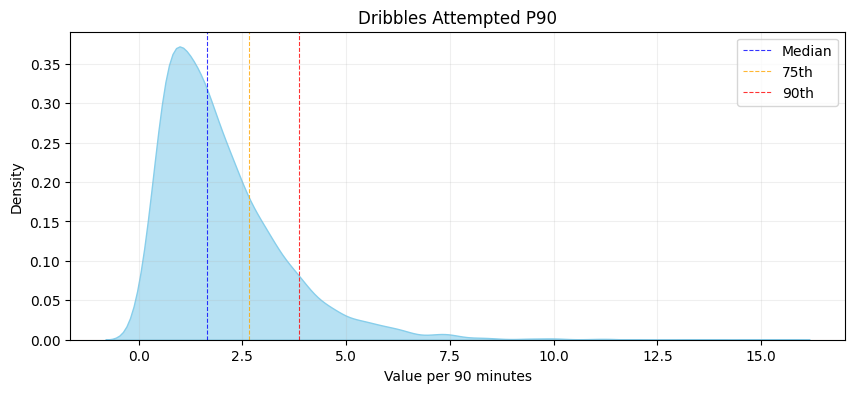

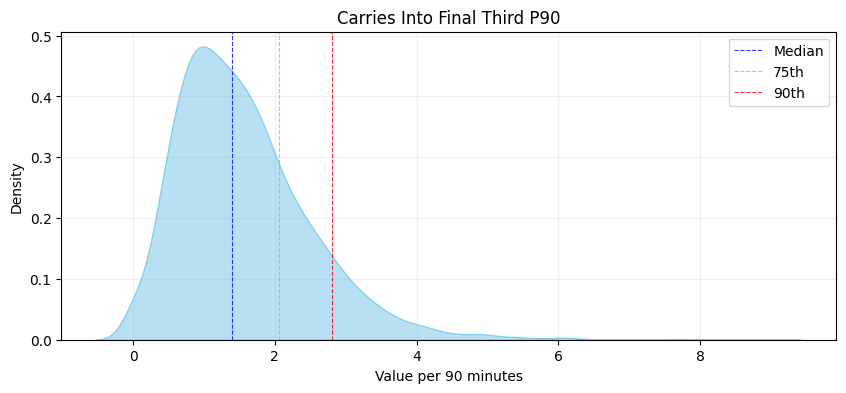

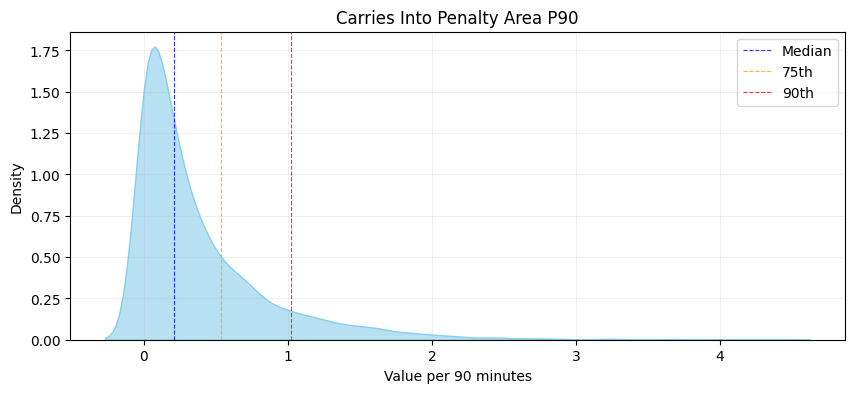

In [19]:
dribbling_features = ['progressive_carries_p90', 'dribbles_attempted_p90', 
                      'carries_into_final_third_p90', 'carries_into_penalty_area_p90']

for feature in dribbling_features:
    plt.figure(figsize=(10, 4))
    plt.title(feature.title().replace('_', ' '))
    plt.xlabel('Value per 90 minutes')
    plt.ylabel('Density')

    sns.kdeplot(data=df_selected, x=feature, fill=True, color='skyblue', alpha=0.6)
    plt.axvline(df_selected[feature].median(), color='blue', linestyle='--', label='Median', linewidth=0.8, alpha=0.8)
    plt.axvline(df_selected[feature].quantile(0.75), color='orange', linestyle='--', label='75th', linewidth=0.8, alpha=0.8)
    plt.axvline(df_selected[feature].quantile(0.90), color='red', linestyle='--', label='90th', linewidth=0.8, alpha=0.8)

    plt.legend()
    plt.grid(alpha=0.2)
    plt.show()

##### **3. Feature Relationship Analysis**

Now we examine relationships BETWEEN feature groups to understand tactical trade-offs. Do defensive players sacrifice attacking output? Do high-volume passers also create chances?

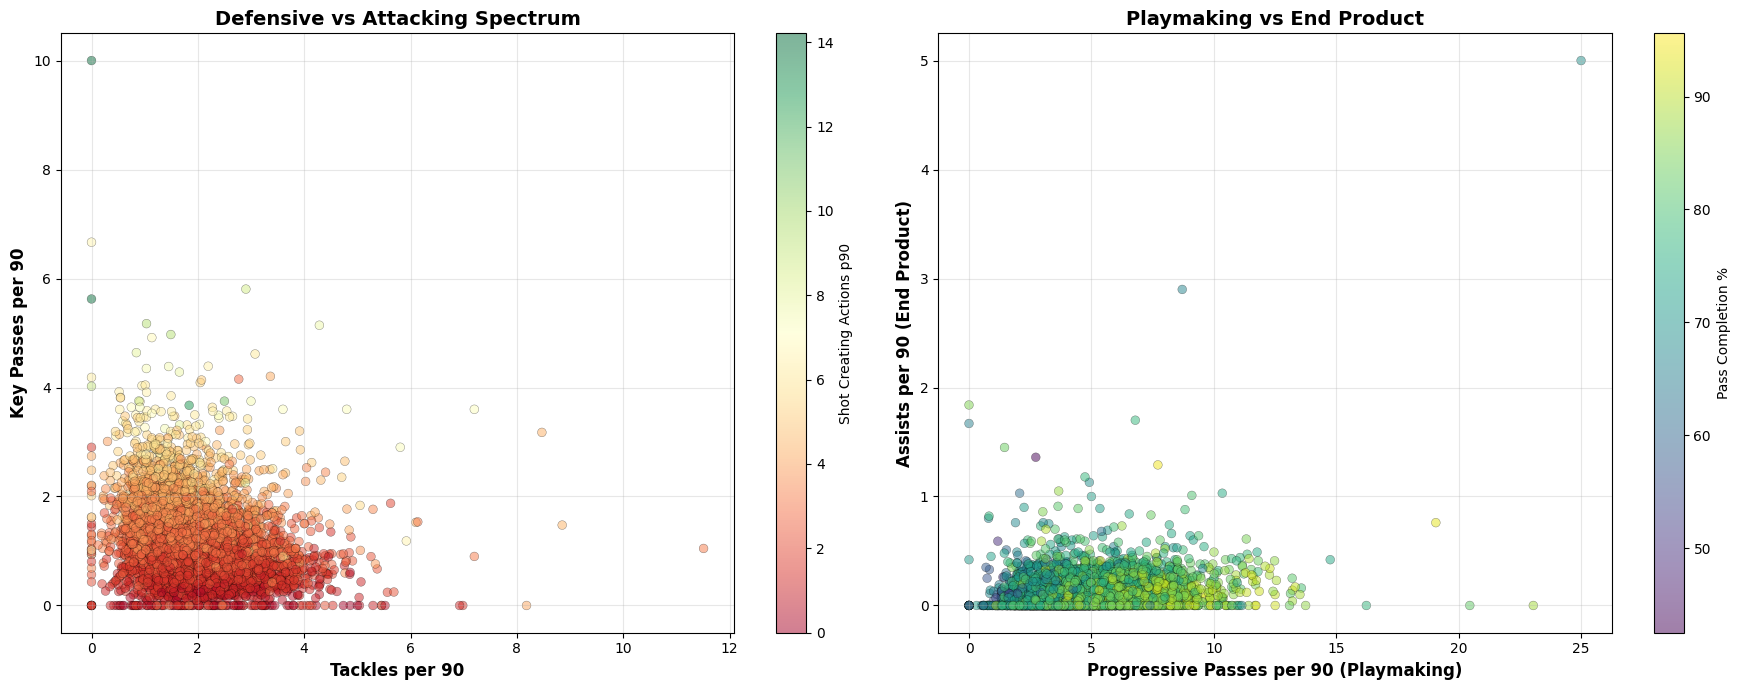

In [20]:
# Scatter: Defensive vs Attacking spectrum
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Tackles vs Key Passes
ax1 = axes[0]
scatter1 = ax1.scatter(df_selected['tackles_attempted_p90'], 
                       df_selected['key_passes_p90'],
                       c=df_selected['shot_creating_actions_p90'],
                       cmap='RdYlGn', alpha=0.5, s=40, edgecolors='black', linewidth=0.3)
ax1.set_xlabel('Tackles per 90', fontsize=12, fontweight='bold')
ax1.set_ylabel('Key Passes per 90', fontsize=12, fontweight='bold')
ax1.set_title('Defensive vs Attacking Spectrum', fontsize=14, fontweight='bold')
ax1.grid(alpha=0.3)
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label('Shot Creating Actions p90', fontsize=10)

# Plot 2: Progressive Passes vs Assists
ax2 = axes[1]
scatter2 = ax2.scatter(df_selected['progressive_passes_p90'], 
                       df_selected['assists_p90'],
                       c=df_selected['pass_completion_pct'],
                       cmap='viridis', alpha=0.5, s=40, edgecolors='black', linewidth=0.3)
ax2.set_xlabel('Progressive Passes per 90 (Playmaking)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Assists per 90 (End Product)', fontsize=12, fontweight='bold')
ax2.set_title('Playmaking vs End Product', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3)
cbar2 = plt.colorbar(scatter2, ax=ax2)
cbar2.set_label('Pass Completion %', fontsize=10)

plt.tight_layout()
plt.show()

##### **4. Correlation Heatmap**

After examining each group, now we see how all 22 features relate across groups.

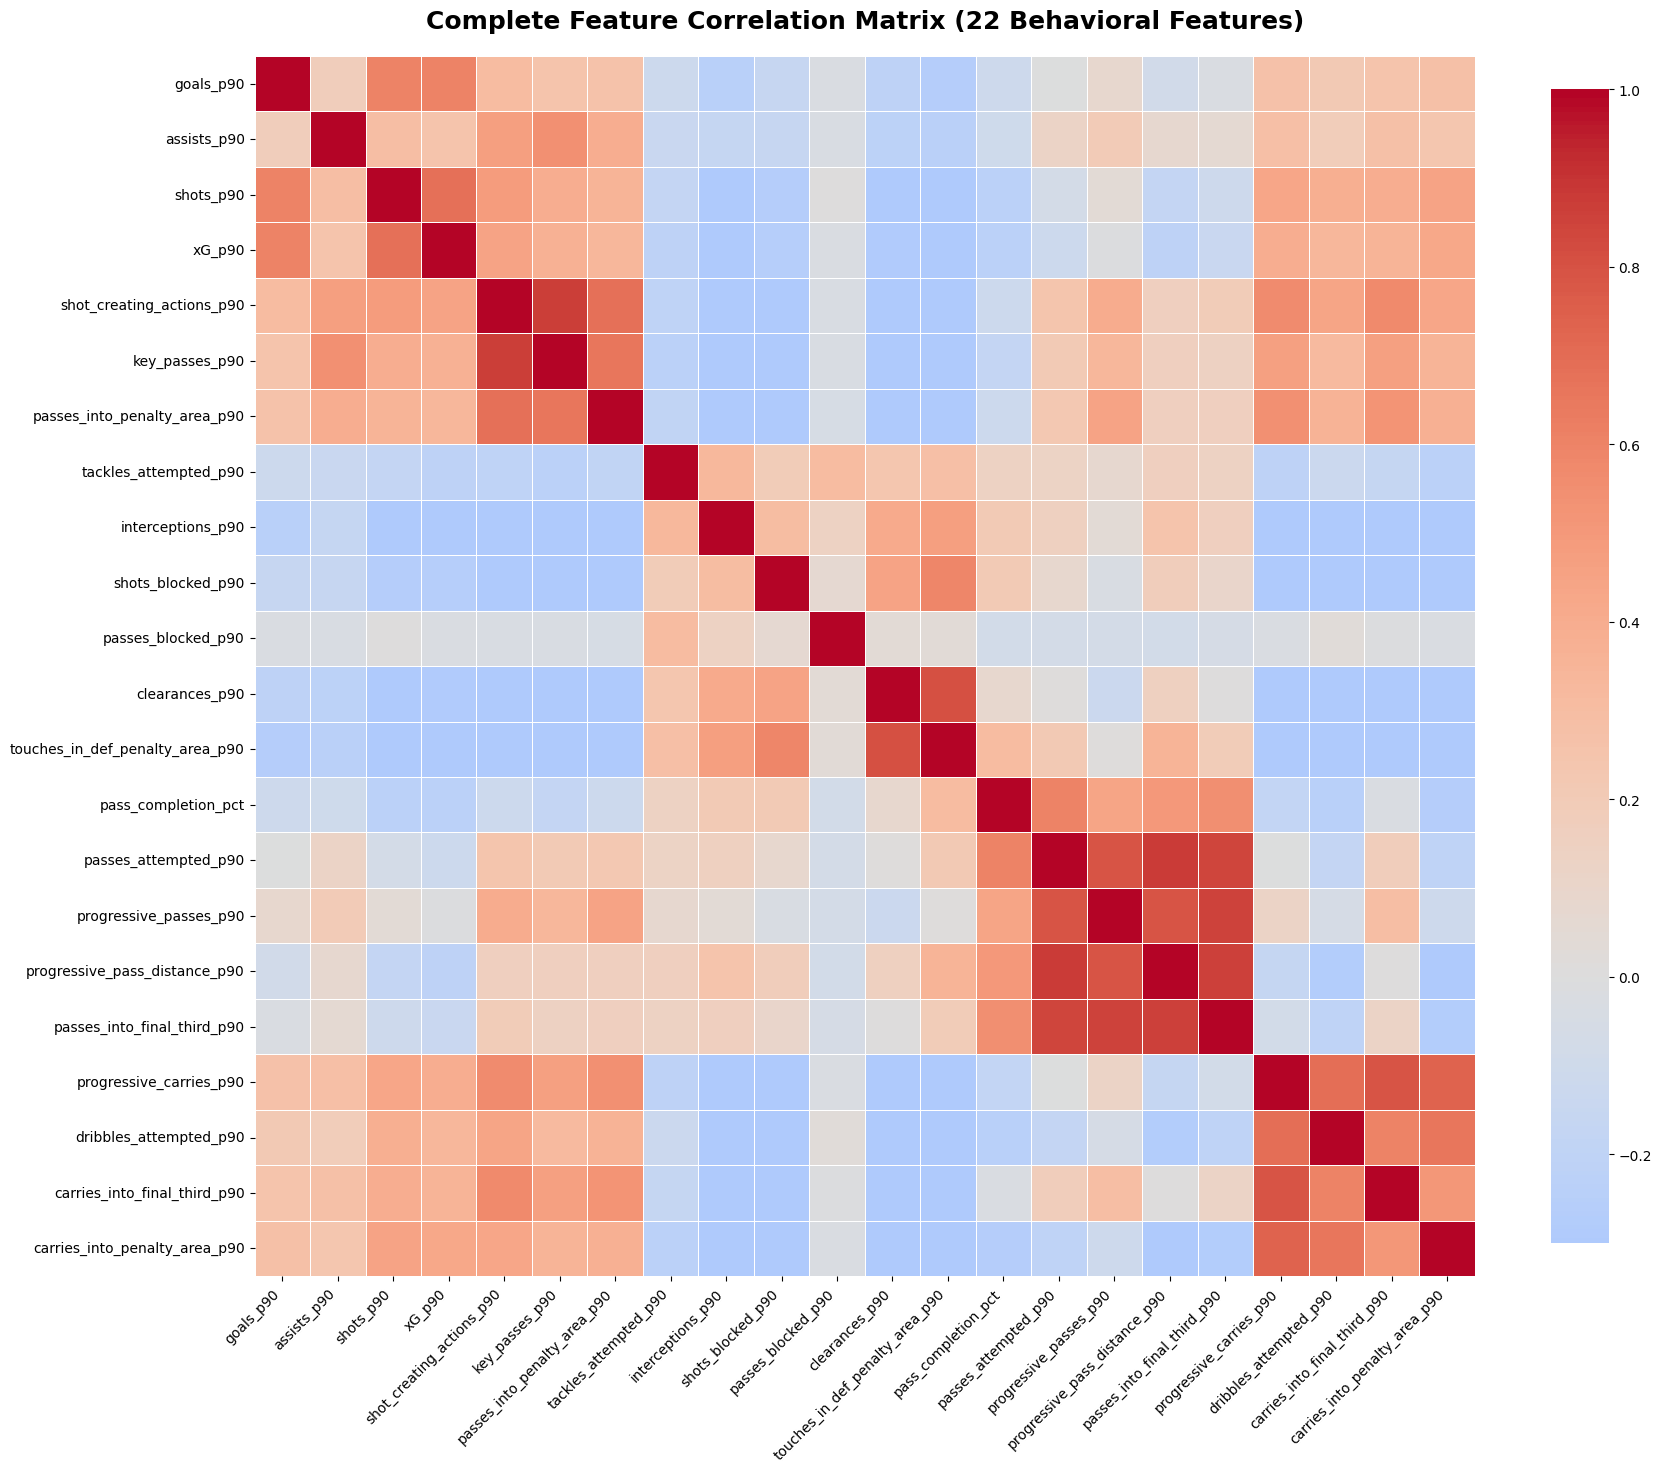

In [21]:
all_features = attacking_features + defensive_features + passing_features + dribbling_features

overall_corr = df_selected[all_features].corr()

plt.figure(figsize=(18, 16))
sns.heatmap(overall_corr, annot=False, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, vmin=-0.3, vmax=1)
plt.title('Complete Feature Correlation Matrix (22 Behavioral Features)', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

##### **5. Compare with Reference Players**

Let's examine well-known players across different feature dimensions to validate whether our data captures tactical reality.

In [22]:
# Expanded list of reference players
reference_players = [
    'Kevin De Bruyne', 'Bruno Fernandes', 'Mason Mount', 'Martin Ødegaard', 'James Maddison',
    'N\'Golo Kanté', 'Casemiro', 'Fabinho', 'Rodri', 'William Carvalho',
    'Toni Kroos', 'Luka Modrić', 'Thiago Alcântara', 'Sergio Busquets', 'Jorginho',
    'Paul Pogba', 'Frenkie de Jong', 'Joshua Kimmich', 'Leon Goretzka', 'Federico Valverde'
]

ref_data = df_selected[df_selected['player_name'].isin(reference_players)]
ref_data_recent = ref_data.sort_values('season', ascending=False).drop_duplicates('player_name')

print(f"Reference players found: {len(ref_data_recent)}")
print(ref_data_recent[['player_name', 'season']])

Reference players found: 19
             player_name     season
18239    Martin Ødegaard  2023-2024
16844     Joshua Kimmich  2023-2024
16050   William Carvalho  2023-2024
16054           Casemiro  2023-2024
16214    Kevin De Bruyne  2023-2024
16544      Leon Goretzka  2023-2024
16758    Frenkie de Jong  2023-2024
16762           Jorginho  2023-2024
16406    Bruno Fernandes  2023-2024
16896         Toni Kroos  2023-2024
17046     James Maddison  2023-2024
17254        Luka Modrić  2023-2024
17284        Mason Mount  2023-2024
17677              Rodri  2023-2024
18069  Federico Valverde  2023-2024
14200       N'Golo Kanté  2022-2023
13313    Sergio Busquets  2022-2023
13739            Fabinho  2022-2023
14922         Paul Pogba  2022-2023


**Attacking Features Comparison**

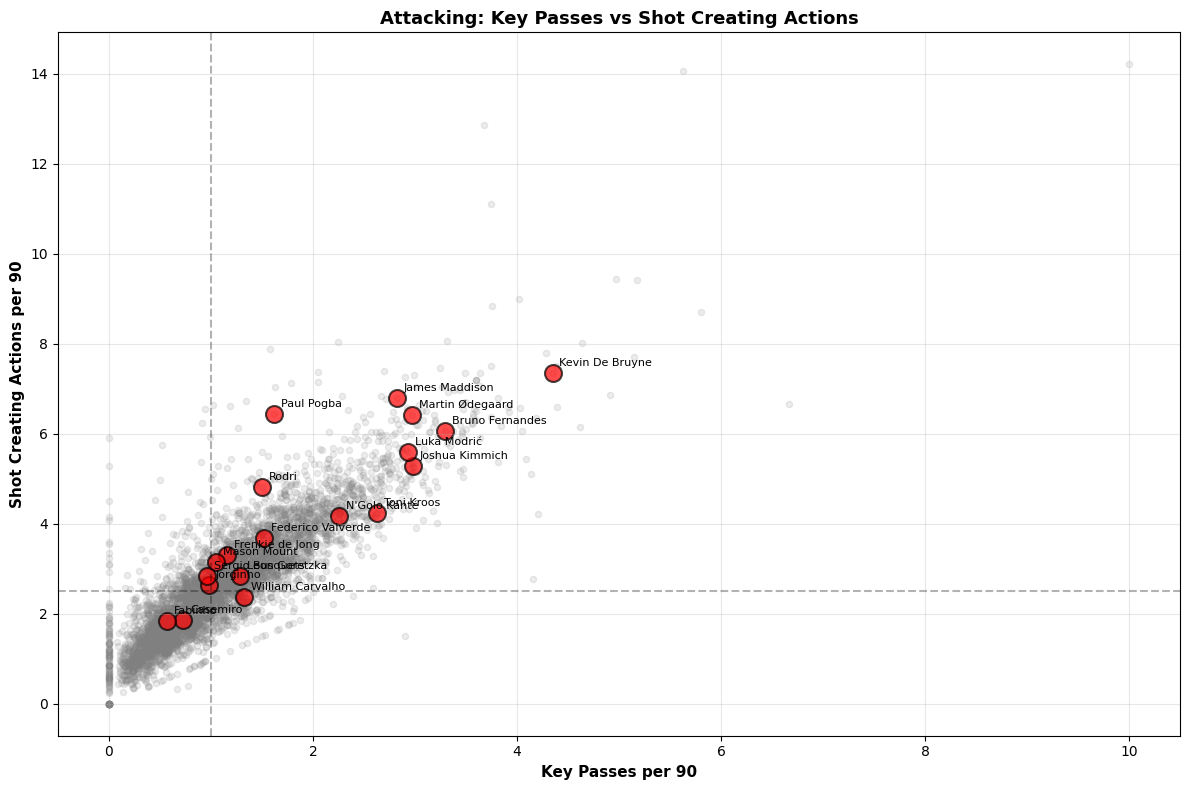

In [23]:
# Attack: Key Passes vs Shot Creating Actions
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(df_selected['key_passes_p90'], df_selected['shot_creating_actions_p90'],
           alpha=0.15, s=20, c='gray', label='All Midfielders')

ax.scatter(ref_data_recent['key_passes_p90'], ref_data_recent['shot_creating_actions_p90'],
           s=150, c='red', alpha=0.7, edgecolors='black', linewidth=1.5)

for _, row in ref_data_recent.iterrows():
    ax.annotate(row['player_name'], 
                (row['key_passes_p90'], row['shot_creating_actions_p90']),
                fontsize=8, xytext=(5, 5), textcoords='offset points')

ax.axvline(df_selected['key_passes_p90'].median(), color='black', linestyle='--', alpha=0.3)
ax.axhline(df_selected['shot_creating_actions_p90'].median(), color='black', linestyle='--', alpha=0.3)
ax.set_xlabel('Key Passes per 90', fontsize=11, fontweight='bold')
ax.set_ylabel('Shot Creating Actions per 90', fontsize=11, fontweight='bold')
ax.set_title('Attacking: Key Passes vs Shot Creating Actions', fontsize=13, fontweight='bold')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Insight:** We can see clear role separation:
 - AMs are high in both key passes and shot creating actions.
 - DMs are low in both metrics.
 - DLPs and B2Bs occupy the middle ground with balanced contributions, with B2B likely being more involved in these two attacking metrics.


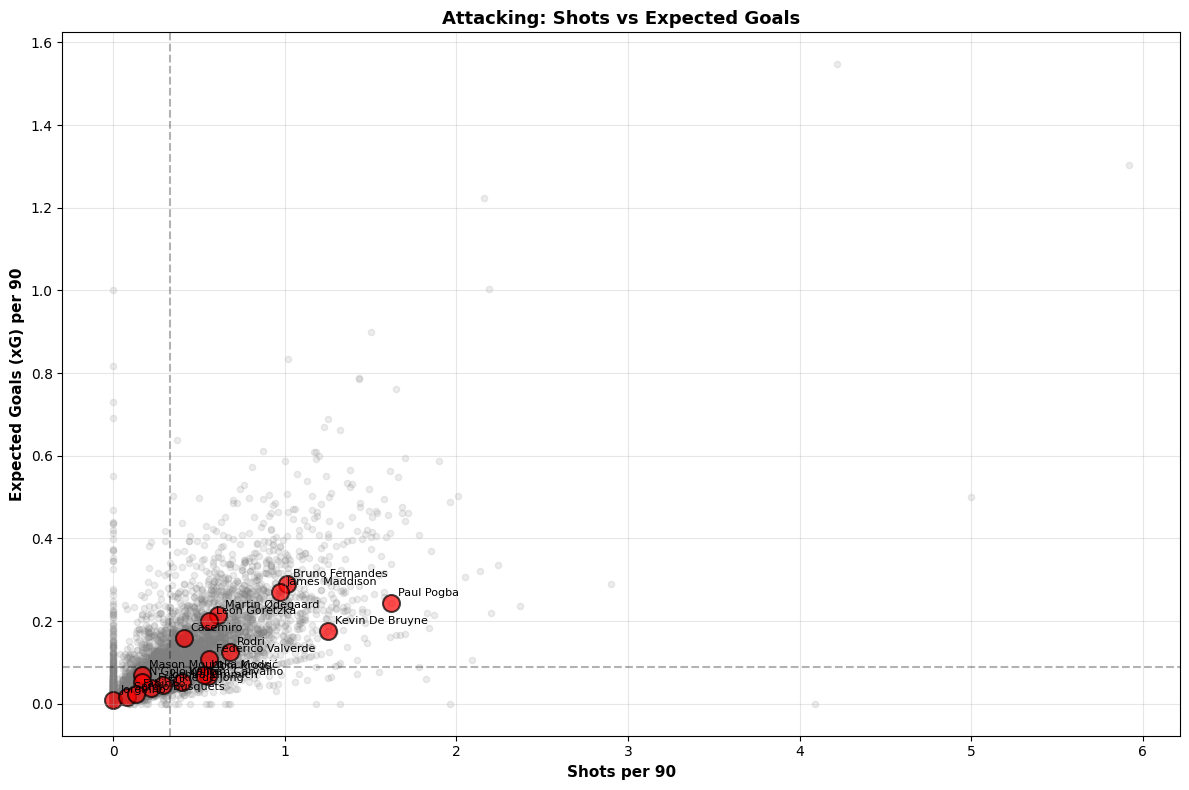

In [24]:
# Attack: xG vs Shots
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(df_selected['shots_p90'], df_selected['xG_p90'],
           alpha=0.15, s=20, c='gray', label='All Midfielders')

ax.scatter(ref_data_recent['shots_p90'], ref_data_recent['xG_p90'],
           s=150, c='red', alpha=0.7, edgecolors='black', linewidth=1.5)

for _, row in ref_data_recent.iterrows():
    ax.annotate(row['player_name'], 
                (row['shots_p90'], row['xG_p90']),
                fontsize=8, xytext=(5, 5), textcoords='offset points')

ax.axvline(df_selected['shots_p90'].median(), color='black', linestyle='--', alpha=0.3)
ax.axhline(df_selected['xG_p90'].median(), color='black', linestyle='--', alpha=0.3)
ax.set_xlabel('Shots per 90', fontsize=11, fontweight='bold')
ax.set_ylabel('Expected Goals (xG) per 90', fontsize=11, fontweight='bold')
ax.set_title('Attacking: Shots vs Expected Goals', fontsize=13, fontweight='bold')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Insight:** From this xG p90 vs Shots p90 comparison, we observe:
 - Some AMs are in the high xG and high shots quadrant, reflecting their offensive focus.
 - However, the groups of DM, DLP and B2B overlap significantly, indicating that these roles may not differ much in shooting volume or quality.
 - This suggests that shooting metrics alone may not be sufficient to distinguish between these roles, as it also depends on team tactics and player quality.
- We also see that some outliers exist, such as players with very high xG but low shots, indicating they get into good positions but may not shoot often.

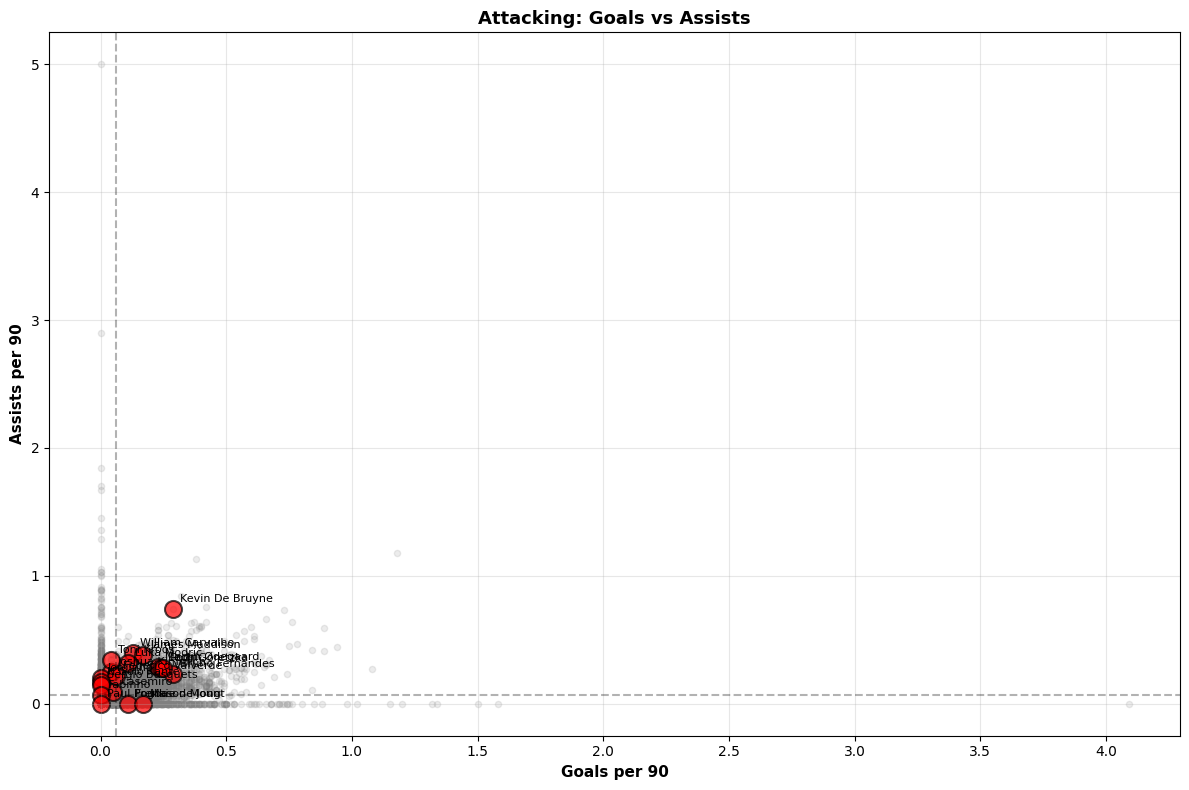

In [25]:
# Attack: Goals vs Assists
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(df_selected['goals_p90'], df_selected['assists_p90'],
           alpha=0.15, s=20, c='gray', label='All Midfielders')

ax.scatter(ref_data_recent['goals_p90'], ref_data_recent['assists_p90'],
           s=150, c='red', alpha=0.7, edgecolors='black', linewidth=1.5)

for _, row in ref_data_recent.iterrows():
    ax.annotate(row['player_name'], 
                (row['goals_p90'], row['assists_p90']),
                fontsize=8, xytext=(5, 5), textcoords='offset points')

ax.axvline(df_selected['goals_p90'].median(), color='black', linestyle='--', alpha=0.3)
ax.axhline(df_selected['assists_p90'].median(), color='black', linestyle='--', alpha=0.3)
ax.set_xlabel('Goals per 90', fontsize=11, fontweight='bold')
ax.set_ylabel('Assists per 90', fontsize=11, fontweight='bold')
ax.set_title('Attacking: Goals vs Assists', fontsize=13, fontweight='bold')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Insight:** This plot shows what we would expect. Goals and asists per 90 are qualitiy metrics that reflect HOW WELL a player performs in attacking contributions. However, these metrics do not necessarily reflect HOW a player plays tactically. For example, a DM might score a few goals from set pieces or long-range shots, but that does not make them an attacking midfielder. We will drop these quality metrics in our modeling.

**Defensive Features Comparison**

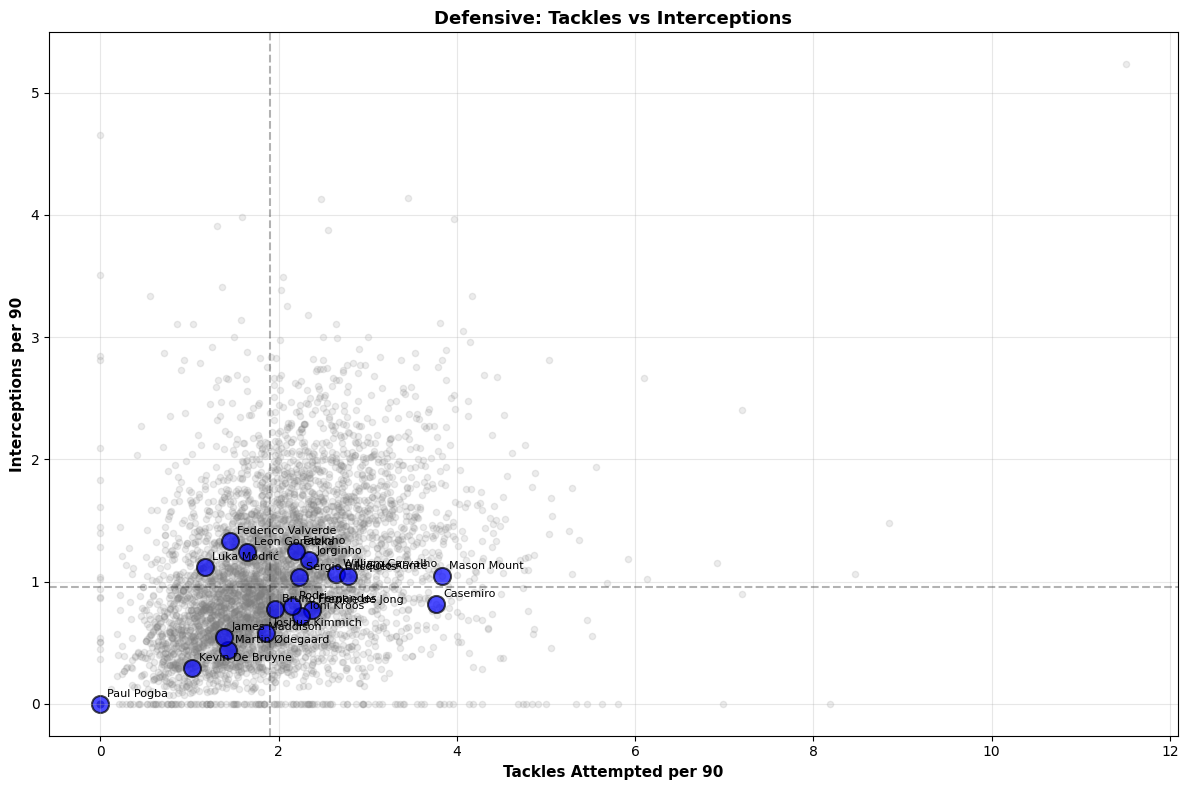

In [26]:
# Defense: Tackles vs Interceptions
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(df_selected['tackles_attempted_p90'], df_selected['interceptions_p90'],
           alpha=0.15, s=20, c='gray', label='All Midfielders')

ax.scatter(ref_data_recent['tackles_attempted_p90'], ref_data_recent['interceptions_p90'],
           s=150, c='blue', alpha=0.7, edgecolors='black', linewidth=1.5)

for _, row in ref_data_recent.iterrows():
    ax.annotate(row['player_name'], 
                (row['tackles_attempted_p90'], row['interceptions_p90']),
                fontsize=8, xytext=(5, 5), textcoords='offset points')

ax.axvline(df_selected['tackles_attempted_p90'].median(), color='black', linestyle='--', alpha=0.3)
ax.axhline(df_selected['interceptions_p90'].median(), color='black', linestyle='--', alpha=0.3)
ax.set_xlabel('Tackles Attempted per 90', fontsize=11, fontweight='bold')
ax.set_ylabel('Interceptions per 90', fontsize=11, fontweight='bold')
ax.set_title('Defensive: Tackles vs Interceptions', fontsize=13, fontweight='bold')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

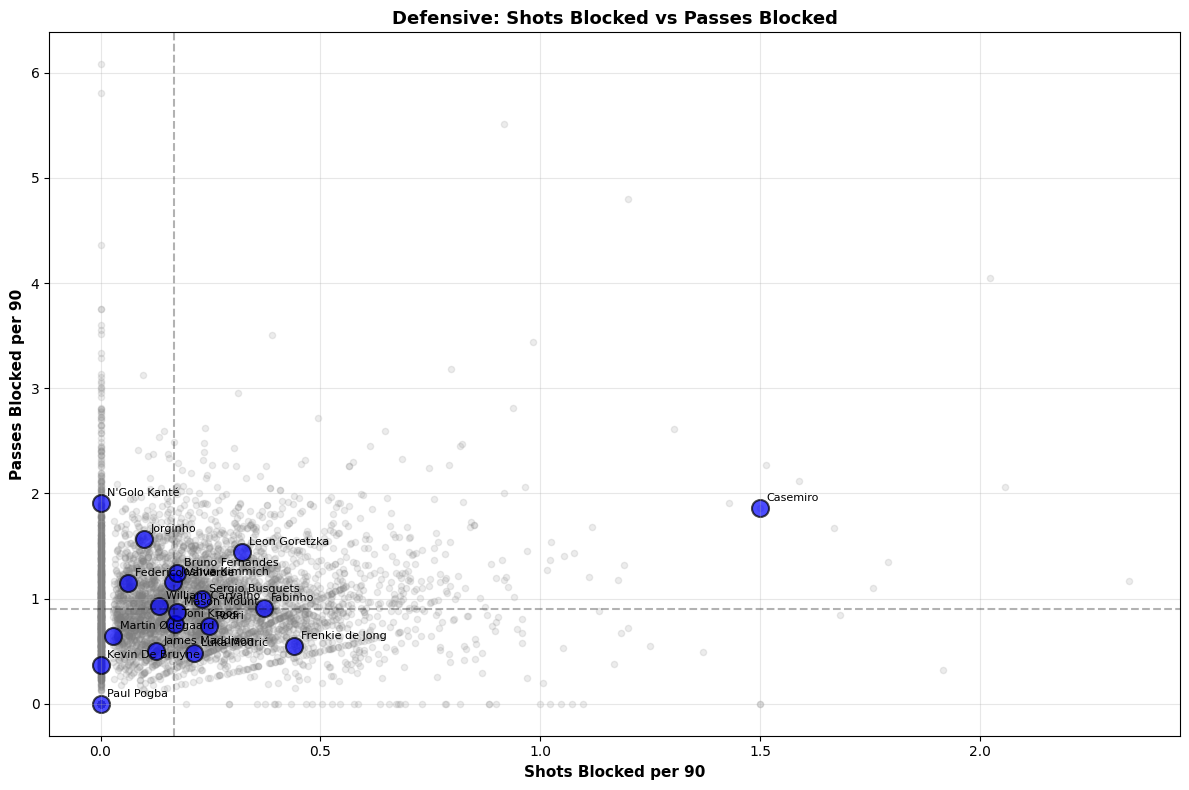

In [27]:
# Defense: Shots Blocked vs Passes Blocked
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(df_selected['shots_blocked_p90'], df_selected['passes_blocked_p90'],
           alpha=0.15, s=20, c='gray', label='All Midfielders')

ax.scatter(ref_data_recent['shots_blocked_p90'], ref_data_recent['passes_blocked_p90'],
           s=150, c='blue', alpha=0.7, edgecolors='black', linewidth=1.5)

for _, row in ref_data_recent.iterrows():
    ax.annotate(row['player_name'], 
                (row['shots_blocked_p90'], row['passes_blocked_p90']),
                fontsize=8, xytext=(5, 5), textcoords='offset points')

ax.axvline(df_selected['shots_blocked_p90'].median(), color='black', linestyle='--', alpha=0.3)
ax.axhline(df_selected['passes_blocked_p90'].median(), color='black', linestyle='--', alpha=0.3)
ax.set_xlabel('Shots Blocked per 90', fontsize=11, fontweight='bold')
ax.set_ylabel('Passes Blocked per 90', fontsize=11, fontweight='bold')
ax.set_title('Defensive: Shots Blocked vs Passes Blocked', fontsize=13, fontweight='bold')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

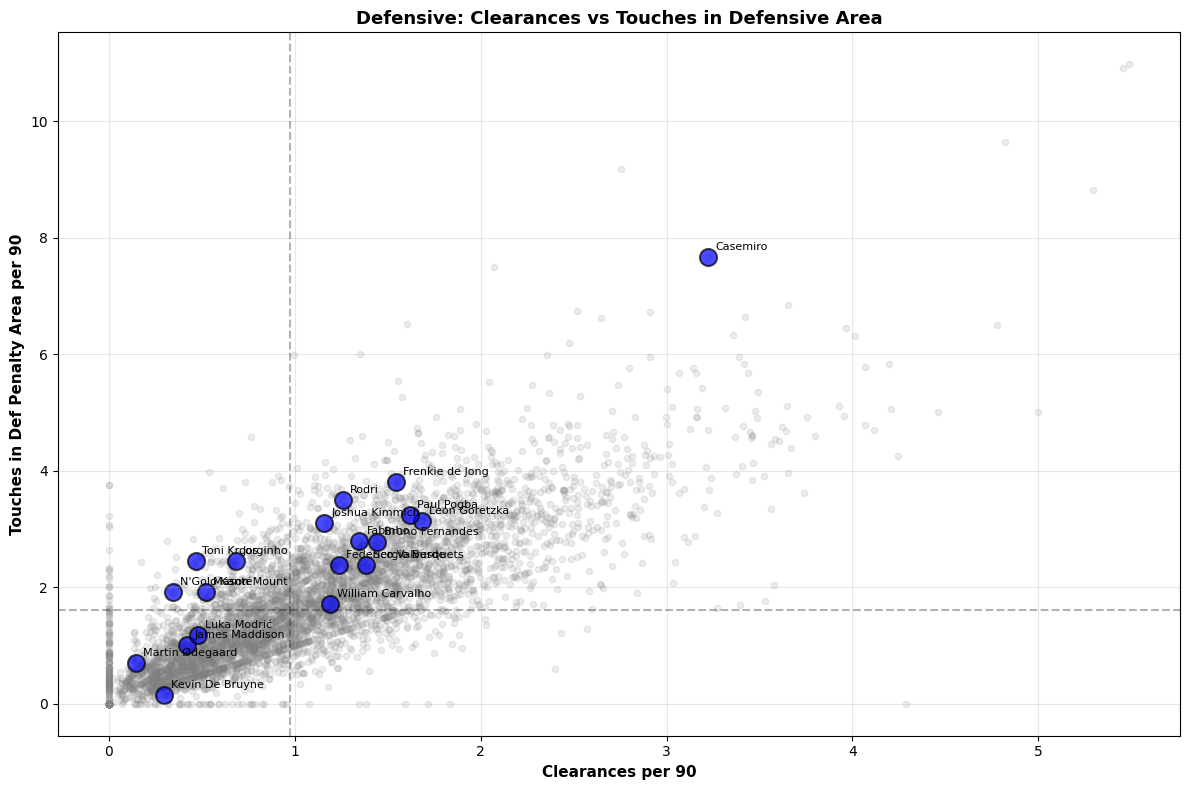

In [28]:
# Defense: Clearances vs Touches in Defensive Penalty Area
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(df_selected['clearances_p90'], df_selected['touches_in_def_penalty_area_p90'],
           alpha=0.15, s=20, c='gray', label='All Midfielders')

ax.scatter(ref_data_recent['clearances_p90'], ref_data_recent['touches_in_def_penalty_area_p90'],
           s=150, c='blue', alpha=0.7, edgecolors='black', linewidth=1.5)

for _, row in ref_data_recent.iterrows():
    ax.annotate(row['player_name'], 
                (row['clearances_p90'], row['touches_in_def_penalty_area_p90']),
                fontsize=8, xytext=(5, 5), textcoords='offset points')

ax.axvline(df_selected['clearances_p90'].median(), color='black', linestyle='--', alpha=0.3)
ax.axhline(df_selected['touches_in_def_penalty_area_p90'].median(), color='black', linestyle='--', alpha=0.3)
ax.set_xlabel('Clearances per 90', fontsize=11, fontweight='bold')
ax.set_ylabel('Touches in Def Penalty Area per 90', fontsize=11, fontweight='bold')
ax.set_title('Defensive: Clearances vs Touches in Defensive Area', fontsize=13, fontweight='bold')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Passing Features Comparison**

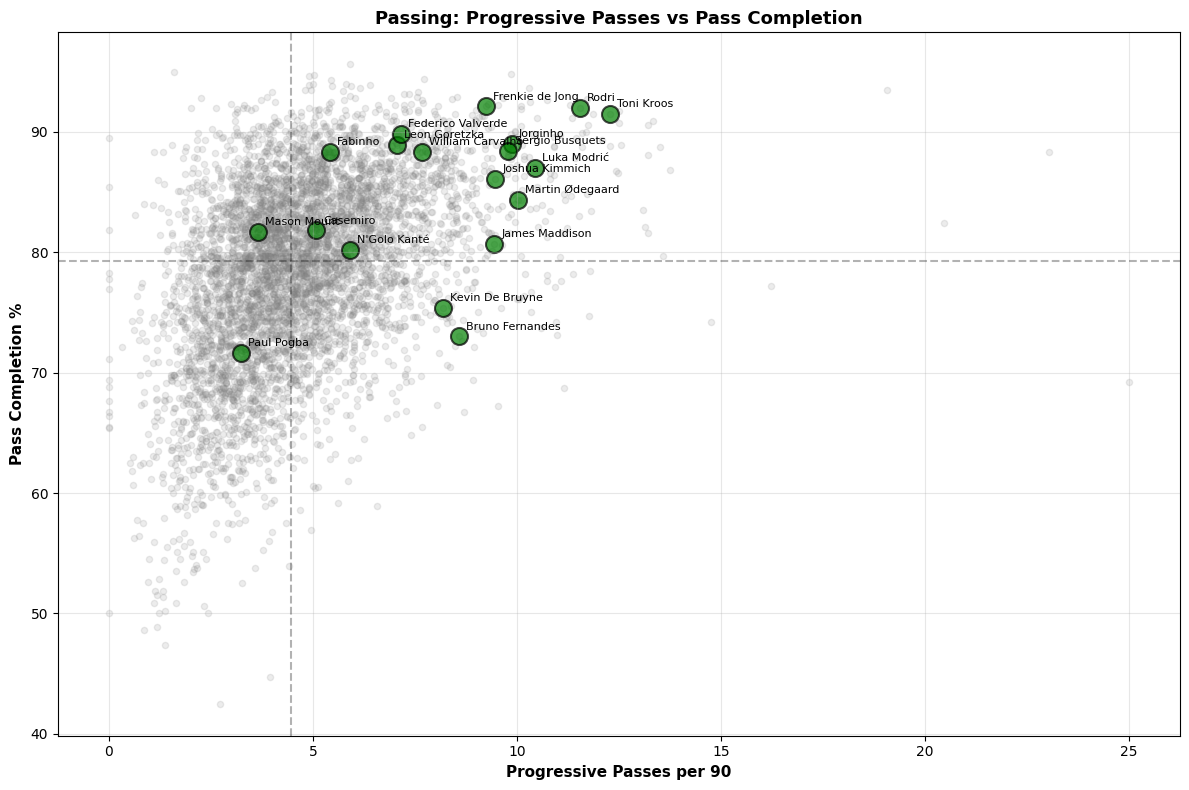

In [29]:
# Passing: Progressive Passes vs Pass Completion
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(df_selected['progressive_passes_p90'], df_selected['pass_completion_pct'],
           alpha=0.15, s=20, c='gray', label='All Midfielders')

ax.scatter(ref_data_recent['progressive_passes_p90'], ref_data_recent['pass_completion_pct'],
           s=150, c='green', alpha=0.7, edgecolors='black', linewidth=1.5)

for _, row in ref_data_recent.iterrows():
    ax.annotate(row['player_name'], 
                (row['progressive_passes_p90'], row['pass_completion_pct']),
                fontsize=8, xytext=(5, 5), textcoords='offset points')

ax.axvline(df_selected['progressive_passes_p90'].median(), color='black', linestyle='--', alpha=0.3)
ax.axhline(df_selected['pass_completion_pct'].median(), color='black', linestyle='--', alpha=0.3)
ax.set_xlabel('Progressive Passes per 90', fontsize=11, fontweight='bold')
ax.set_ylabel('Pass Completion %', fontsize=11, fontweight='bold')
ax.set_title('Passing: Progressive Passes vs Pass Completion', fontsize=13, fontweight='bold')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Insight:** 
- DLPs generally have higher pass completion percentages, reflecting their role in maintaining possession and distributing the ball safely.
 - AMs tend to have lower pass completion percentages, likely due to attempting riskier, more creative passes in advanced positions.

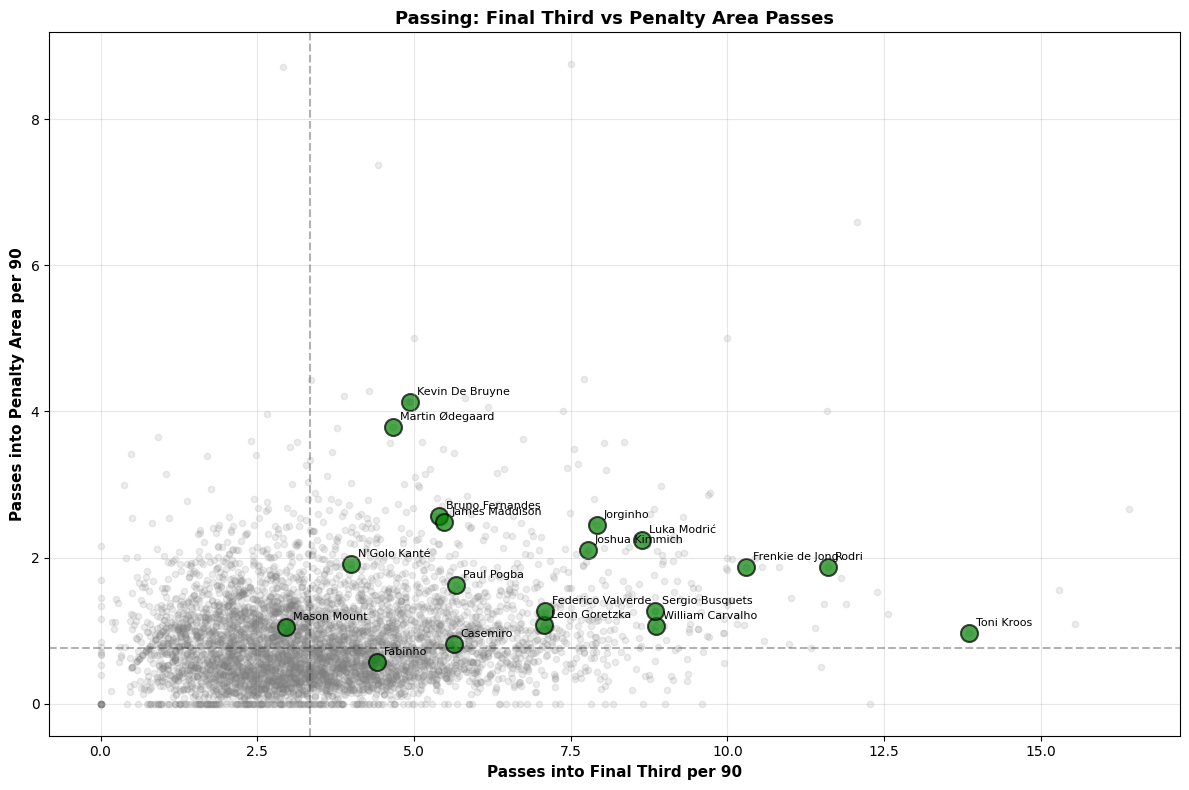

In [30]:
# Passing: Passes into Final Third vs Passes into Penalty Area
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(df_selected['passes_into_final_third_p90'], df_selected['passes_into_penalty_area_p90'],
           alpha=0.15, s=20, c='gray', label='All Midfielders')

ax.scatter(ref_data_recent['passes_into_final_third_p90'], ref_data_recent['passes_into_penalty_area_p90'],
           s=150, c='green', alpha=0.7, edgecolors='black', linewidth=1.5)

for _, row in ref_data_recent.iterrows():
    ax.annotate(row['player_name'], 
                (row['passes_into_final_third_p90'], row['passes_into_penalty_area_p90']),
                fontsize=8, xytext=(5, 5), textcoords='offset points')

ax.axvline(df_selected['passes_into_final_third_p90'].median(), color='black', linestyle='--', alpha=0.3)
ax.axhline(df_selected['passes_into_penalty_area_p90'].median(), color='black', linestyle='--', alpha=0.3)
ax.set_xlabel('Passes into Final Third per 90', fontsize=11, fontweight='bold')
ax.set_ylabel('Passes into Penalty Area per 90', fontsize=11, fontweight='bold')
ax.set_title('Passing: Final Third vs Penalty Area Passes', fontsize=13, fontweight='bold')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Insight:**
- AMs have the highest volume of passes into penalty area, reflecting their attacking role.
- DLPs, on the other hand, have high progressive passes but lower passes into penalty area, indicating their focus on build-up play rather than final-third penetration.
- Especially, DM players have the lowest values in both metrics, consistent with their defensive responsibilities.
- B2B midfielders occupy a middle ground, contributing to both progressive passing and some penalty area involvement.

**Dribbling Features Comparison**

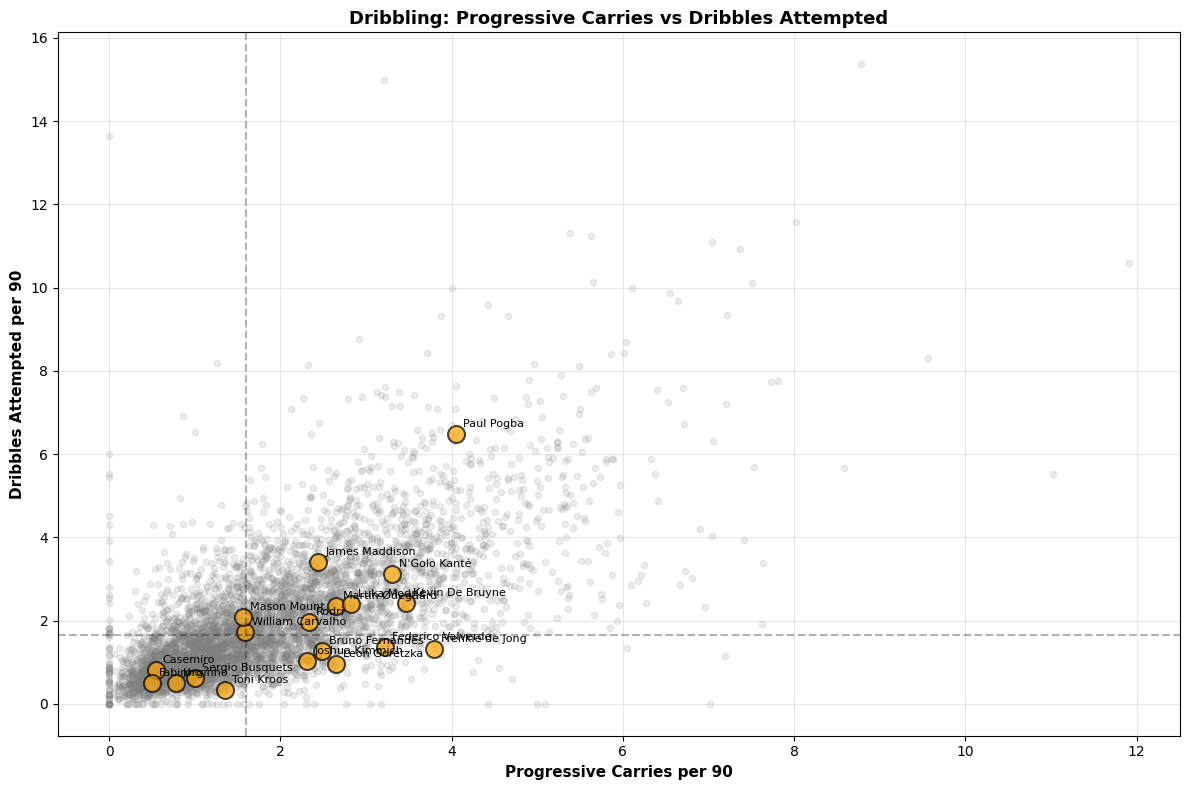

In [31]:
# Dribbling: Progressive Carries vs Dribbles Attempted
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(df_selected['progressive_carries_p90'], df_selected['dribbles_attempted_p90'],
           alpha=0.15, s=20, c='gray', label='All Midfielders')

ax.scatter(ref_data_recent['progressive_carries_p90'], ref_data_recent['dribbles_attempted_p90'],
           s=150, c='orange', alpha=0.7, edgecolors='black', linewidth=1.5)

for _, row in ref_data_recent.iterrows():
    ax.annotate(row['player_name'], 
                (row['progressive_carries_p90'], row['dribbles_attempted_p90']),
                fontsize=8, xytext=(5, 5), textcoords='offset points')

ax.axvline(df_selected['progressive_carries_p90'].median(), color='black', linestyle='--', alpha=0.3)
ax.axhline(df_selected['dribbles_attempted_p90'].median(), color='black', linestyle='--', alpha=0.3)
ax.set_xlabel('Progressive Carries per 90', fontsize=11, fontweight='bold')
ax.set_ylabel('Dribbles Attempted per 90', fontsize=11, fontweight='bold')
ax.set_title('Dribbling: Progressive Carries vs Dribbles Attempted', fontsize=13, fontweight='bold')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

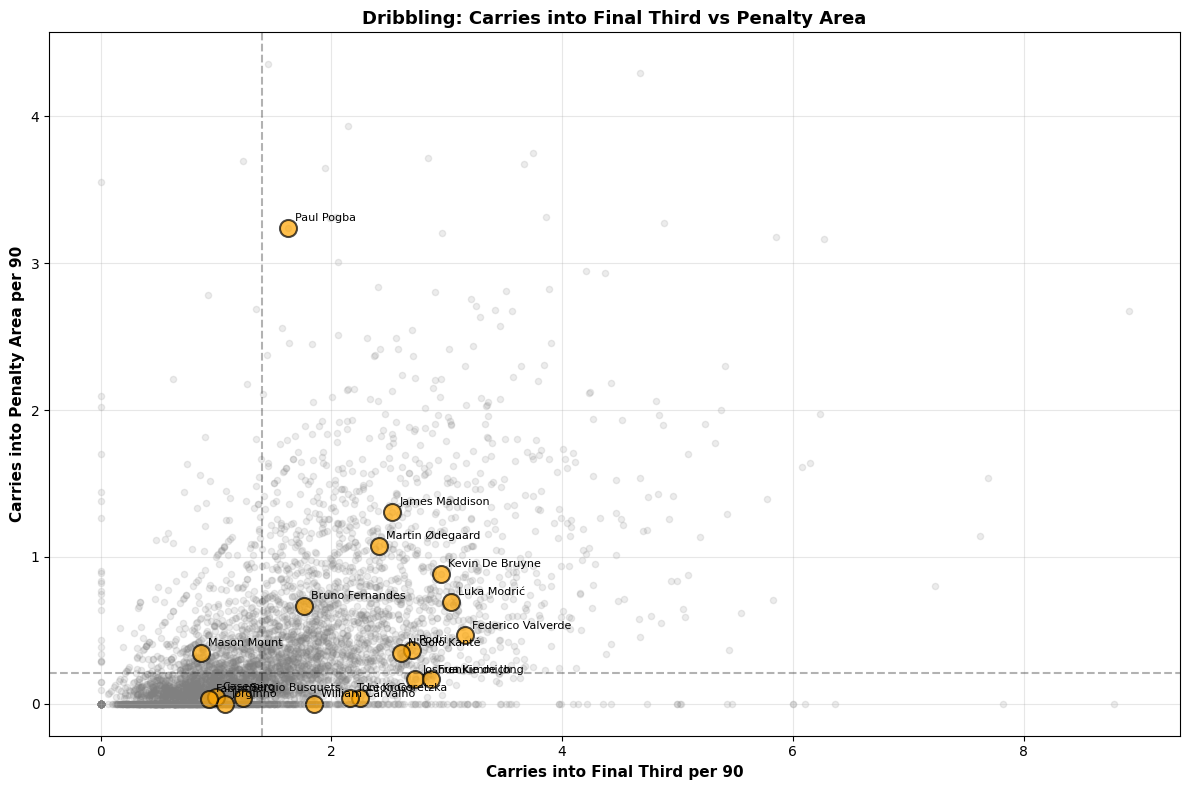

In [32]:
# Dribbling: Carries into Final Third vs Carries into Penalty Area
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(df_selected['carries_into_final_third_p90'], df_selected['carries_into_penalty_area_p90'],
           alpha=0.15, s=20, c='gray', label='All Midfielders')

ax.scatter(ref_data_recent['carries_into_final_third_p90'], ref_data_recent['carries_into_penalty_area_p90'],
           s=150, c='orange', alpha=0.7, edgecolors='black', linewidth=1.5)

for _, row in ref_data_recent.iterrows():
    ax.annotate(row['player_name'], 
                (row['carries_into_final_third_p90'], row['carries_into_penalty_area_p90']),
                fontsize=8, xytext=(5, 5), textcoords='offset points')

ax.axvline(df_selected['carries_into_final_third_p90'].median(), color='black', linestyle='--', alpha=0.3)
ax.axhline(df_selected['carries_into_penalty_area_p90'].median(), color='black', linestyle='--', alpha=0.3)
ax.set_xlabel('Carries into Final Third per 90', fontsize=11, fontweight='bold')
ax.set_ylabel('Carries into Penalty Area per 90', fontsize=11, fontweight='bold')
ax.set_title('Dribbling: Carries into Final Third vs Penalty Area', fontsize=13, fontweight='bold')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### **5. Role Assignment**

##### **1. Define Composite Scores**

**Decision:** Use 3 tactical dimensions based on EDA findings.

After analyzing the EDA results, we refined our feature selection:
- **Drop xG_p90 and goals_p90**: Expected goals and goals are quality metrics (HOW WELL), not behavioral metrics (HOW they play).
- **Drop assists_p90**: Similar to goals, assists reflect output quality rather than playing style. A DM might get a few assists from set pieces without being an attacking midfielder.
- **Drop dribbling metrics**: From the reference player comparison, dribbling is a personal style modifier that cuts across roles (you can have dribbling AMs or dribbling DMs). 
- **Keep carrying metrics**: Unlike dribbling, carrying (progressive carries, carries into final third/penalty area) indicates offensive progression and positional play, which are key to distinguishing attacking involvement.

Therefore, we define **3 composite scores** based on relative strengths:
1. **Attacking Score** (5 features) - `shots_p90`, `shot_creating_actions_p90`, `carries_into_penalty_area_p90`, `passes_into_penalty_area_p90`, `key_passes_p90`
2. **Defensive Score** (6 features) - `tackles_attempted_p90`, `interceptions_p90`, `clearances_p90`, `shots_blocked_p90`, `passes_blocked_p90`, `touches_in_def_penalty_area_p90`
3. **Playmaking Score** (7 features) - `progressive_passes_p90`, `pass_completion_pct`, `passes_attempted_p90`, `progressive_pass_distance_p90`, `passes_into_final_third_p90`, `carries_into_final_third_p90`, `progressive_carries_p90`

**Explanation:** These 3 dimensions focus on behavioral patterns rather than output quality. Carrying metrics are included in attacking score as they represent offensive ball progression, while dribbling is excluded as it's a style modifier that doesn't define tactical roles.

In [33]:
# Define feature groups for each dimension
attacking_dimension = ['shots_p90', 'shot_creating_actions_p90', 
                       'carries_into_penalty_area_p90', 'passes_into_penalty_area_p90', 'key_passes_p90']
defensive_dimension = ['tackles_attempted_p90', 'interceptions_p90', 'clearances_p90',
                       'shots_blocked_p90', 'passes_blocked_p90', 'touches_in_def_penalty_area_p90']
playmaking_dimension = ['progressive_passes_p90', 'pass_completion_pct', 'passes_attempted_p90',
                        'progressive_pass_distance_p90', 'passes_into_final_third_p90',
                        'carries_into_final_third_p90', 'progressive_carries_p90']

In [34]:
# Create composite scores by averaging features in each group
df_selected['attacking_score'] = df_selected[attacking_dimension].mean(axis=1)
df_selected['defensive_score'] = df_selected[defensive_dimension].mean(axis=1)
df_selected['playmaking_score'] = df_selected[playmaking_dimension].mean(axis=1)

In [35]:
from sklearn.preprocessing import StandardScaler

df_selected['attacking_score'] = df_selected[attacking_dimension].mean(axis=1)
df_selected['defensive_score'] = df_selected[defensive_dimension].mean(axis=1)
df_selected['playmaking_score'] = df_selected[playmaking_dimension].mean(axis=1)

# Standardize scores
scaler = StandardScaler()
df_selected[['attacking_score_z', 'defensive_score_z', 'playmaking_score_z']] = scaler.fit_transform(
    df_selected[['attacking_score', 'defensive_score', 'playmaking_score']]
)

print("Samples:")
print(df_selected[['player_name', 'attacking_score_z', 'defensive_score_z', 'playmaking_score_z']].head())
print(df_selected[df_selected['player_name'].isin(reference_players)][
    ['player_name', 'attacking_score_z', 'defensive_score_z', 'playmaking_score_z']])

Samples:
       player_name  attacking_score_z  defensive_score_z  playmaking_score_z
2   Rolando Aarons          -0.867605          -1.223413           -1.529141
6      Mehdi Abeid          -1.013579           0.408003            0.057681
9     Amir Abrashi          -1.011329           1.995568           -0.737008
11  Afriyie Acquah          -0.902703          -0.836113           -0.160412
12    Charlie Adam           0.666845           0.613267            1.519155
             player_name  attacking_score_z  defensive_score_z  \
367      Sergio Busquets          -0.694770           0.396415   
436             Casemiro          -0.454271           2.453650   
591      Kevin De Bruyne           3.209947          -0.789385   
742              Fabinho          -0.156943           1.038679   
921        Leon Goretzka          -0.110106           0.778399   
...                  ...                ...                ...   
17254        Luka Modrić           2.223380          -0.869668   
1

##### **2. Assign Roles Based on Dominant Dimension**

As our initial dataset does not include tactical role labels, each player will be assigned a role based on which dimension they score highest in:
- **AM** = highest attacking score
- **DM** = highest defensive score
- **DLP** = highest playmaking score
- **B2B** = balanced profile (no single dominant dimension)

We use a threshold to identify B2B players. If the difference between the highest and second-highest score is less than the threshold that we set, the player is considered balanced and labeled as B2B. We will try many times to find the most suitable threshold.

In [36]:
def assign_role(row, threshold):
    """
    Assign a role based on the player's dominant tactical dimension.
    If no dimension is clearly dominant (difference < threshold), assign B2B.
    """
    a = row['attacking_score_z']
    d = row['defensive_score_z']
    p = row['playmaking_score_z']

    if abs(a - d) < threshold and abs(a - p) < threshold and abs(d - p) < threshold:
        return 'B2B'

    if a >= d and a >= p:
        return 'AM'
    elif d >= a and d >= p:
        return 'DM'
    elif p >= a and p >= d:
        return 'DLP'

In [37]:
def role_distribution(df):
    print("Role distribution:")
    print(df['role'].value_counts())

    print("Percentages:")
    print((df['role'].value_counts() / len(df) * 100).round(1).astype(str) + '%')

**Attemp Log:**
1. Threshold = 0.3 -> Too few B2B (2.5%)
2. Threshold = 0.5 -> Better B2B count (6.3%)
3. Threshold = 0.7 -> More B2B (12.4%) but still low

In [38]:
ASSIGN_THRESHOLD = 0.7

# Apply role assignment
df_selected['role'] = df_selected.apply(lambda row: assign_role(row, ASSIGN_THRESHOLD), axis=1)
role_distribution(df_selected)

Role distribution:
role
AM     1801
DM     1745
DLP    1104
B2B     656
Name: count, dtype: int64
Percentages:
role
AM     33.9%
DM     32.9%
DLP    20.8%
B2B    12.4%
Name: count, dtype: object


In [39]:
print(df_selected[df_selected['role']=='DM'][
      ['player_name','role', 'attacking_score_z', 'defensive_score_z', 'playmaking_score_z']].to_string(index=False))
                  

               player_name role  attacking_score_z  defensive_score_z  playmaking_score_z
               Mehdi Abeid   DM          -1.013579           0.408003            0.057681
              Amir Abrashi   DM          -1.011329           1.995568           -0.737008
         Jean-Eudes Aholou   DM          -1.172112           0.715042           -0.159372
                 Joe Allen   DM          -0.489267           1.124054           -0.295580
         Romain Amalfitano   DM          -0.719641           0.684379            0.375241
            Benjamin André   DM          -0.407663           1.580981            0.116088
           Mauro Arambarri   DM          -1.211824           0.236367           -0.979370
             Scott Arfield   DM          -0.793604           0.279588           -1.494263
        Santiago Ascacíbar   DM          -1.231638           1.215535           -0.255485
             Karim Azamoum   DM          -0.703270           1.245311           -0.785195
          

In [40]:
print(df_selected[df_selected['role']=='AM'][
      ['player_name','role', 'attacking_score_z', 'defensive_score_z', 'playmaking_score_z']].to_string(index=False))

               player_name role  attacking_score_z  defensive_score_z  playmaking_score_z
             Chadrac Akolo   AM           0.440079          -1.010674           -1.376167
              Paco Alcácer   AM           0.025368          -1.234140           -1.416546
                Iván Alejo   AM           0.523909          -1.480950           -1.461036
                 Alexander   AM           0.412563          -0.858444           -1.304765
                 Dele Alli   AM           1.203056          -0.863712           -0.606719
             Ricky Álvarez   AM           1.360354          -0.476769            0.080028
                     Amath   AM          -0.318206          -0.431834           -1.653812
              Nadiem Amiri   AM           0.967639          -0.477534           -0.314193
                André Ayew   AM          -0.100103          -0.800225           -1.449069
            Farès Bahlouli   AM           1.836418          -0.428956           -0.188008
          

In [41]:
print(df_selected[df_selected['role']=='DLP'][
      ['player_name', 'role', 'attacking_score_z', 'defensive_score_z', 'playmaking_score_z']].to_string(index=False))

                   player_name role  attacking_score_z  defensive_score_z  playmaking_score_z
                Afriyie Acquah  DLP          -0.902703          -0.836113           -0.160412
                  Charlie Adam  DLP           0.666845           0.613267            1.519155
               Ibrahim Afellay  DLP          -1.879800          -1.368339           -0.363578
         Youssef Aït Bennasser  DLP          -0.707413           0.562294            0.923740
              Thiago Alcántara  DLP           1.010286           0.473978            3.385237
                Ibrahim Amadou  DLP          -1.318340           1.353150            1.813052
                   Dennis Aogo  DLP          -0.492129          -0.102341            0.474898
              Alberto Aquilani  DLP          -0.693125           1.057074            1.376521
              Charles Aránguiz  DLP          -0.191715           0.851918            1.954688
             Maximilian Arnold  DLP           0.055381      

In [42]:
print(df_selected[df_selected['role']=='B2B'][
      ['player_name', 'role', 'attacking_score_z', 'defensive_score_z', 'playmaking_score_z']].to_string(index=False))

               player_name role  attacking_score_z  defensive_score_z  playmaking_score_z
            Rolando Aarons  B2B          -0.867605          -1.223413           -1.529141
           Marc Albrighton  B2B           0.217321           0.000592            0.124185
                     Allan  B2B           0.399508           0.108976            0.228027
         Morgan Amalfitano  B2B          -0.560385          -1.106258           -0.859120
             Houssem Aouar  B2B           0.550763           0.163447            0.429779
                André Ayew  B2B          -0.916464          -1.127652           -1.467270
             Andrija Balić  B2B          -0.172375          -0.325885           -0.008750
             Antonín Barák  B2B           0.161718          -0.521395           -0.254108
            Nicolò Barella  B2B          -0.016196           0.672554            0.400632
          Riechedly Bazoer  B2B          -1.151131          -0.788246           -0.708143
          

After trying to find a suitable threshold, I found that the pairwise distance approach (checking if |a-d|, |a-p|, and |d-p| are all < threshold) produces very few B2B players. This is because it requires all three pairwise distances to be small simultaneously, which is quite restrictive.

**Improved Approach:** Use mean-based distance to check if all three dimensions are close to their average. This treats all dimensions equally and truly represents a "balanced" profile.

In [43]:
def assign_role(row, threshold):
    """
    Assign a role based on the player's dominant tactical dimension.
    Uses mean-based distance: If all three dimensions are close to their mean, assign B2B.
    This approach is symmetric and treats all dimensions equally.
    """
    a = row['attacking_score_z']
    d = row['defensive_score_z']
    p = row['playmaking_score_z']
    
    mean_score = (a + d + p) / 3
    
    # B2B check 
    if (abs(a - mean_score) < threshold and 
        abs(d - mean_score) < threshold and 
        abs(p - mean_score) < threshold):
        return 'B2B'
    
    # Assign role based on dominant dimension
    if a >= d and a >= p:
        return 'AM'
    elif d >= a and d >= p:
        return 'DM'
    else:
        return 'DLP'

In [44]:
ASSIGN_THRESHOLD = 0.5

# Apply role assignment
df_selected['role'] = df_selected.apply(lambda row: assign_role(row, ASSIGN_THRESHOLD), axis=1)
role_distribution(df_selected)

Role distribution:
role
AM     1701
DM     1654
DLP    1011
B2B     940
Name: count, dtype: int64
Percentages:
role
AM     32.1%
DM     31.2%
DLP    19.1%
B2B    17.7%
Name: count, dtype: object


As expected, this new approach yields a more reasonable distribution of roles.

In [45]:
print(df_selected[df_selected['role']=='B2B'][
      ['player_name', 'role', 'attacking_score_z', 'defensive_score_z', 'playmaking_score_z']].to_string(index=False))

               player_name role  attacking_score_z  defensive_score_z  playmaking_score_z
            Rolando Aarons  B2B          -0.867605          -1.223413           -1.529141
            Afriyie Acquah  B2B          -0.902703          -0.836113           -0.160412
           Marc Albrighton  B2B           0.217321           0.000592            0.124185
                     Allan  B2B           0.399508           0.108976            0.228027
         Morgan Amalfitano  B2B          -0.560385          -1.106258           -0.859120
             Houssem Aouar  B2B           0.550763           0.163447            0.429779
                André Ayew  B2B          -0.916464          -1.127652           -1.467270
             Andrija Balić  B2B          -0.172375          -0.325885           -0.008750
             Antonín Barák  B2B           0.161718          -0.521395           -0.254108
               Enis Bardhi  B2B           0.225528          -0.694056           -0.348299
          

##### **3. Validate Role Assignments**

Let's visualize the assigned roles to check if they make tactical sense.

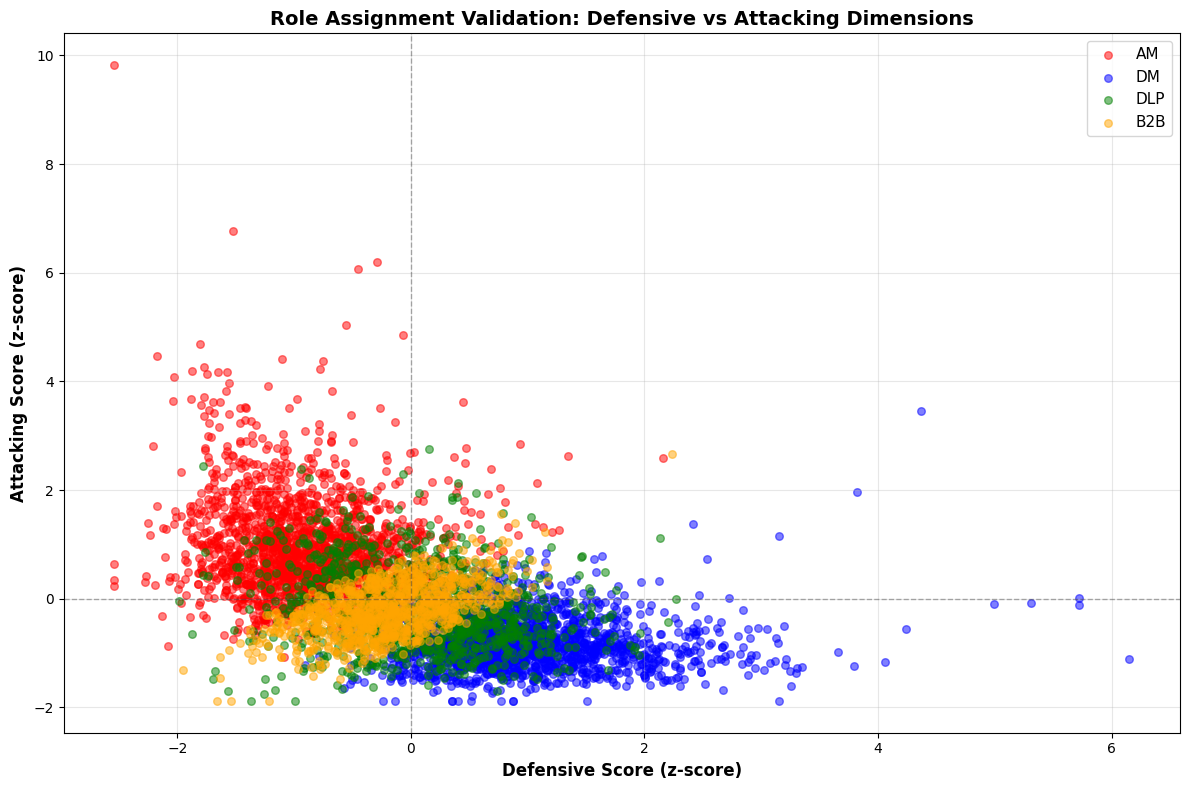

In [46]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = {'AM': 'red', 'DM': 'blue', 'DLP': 'green', 'B2B': 'orange'}
for role in ['AM', 'DM', 'DLP', 'B2B']:
    role_data = df_selected[df_selected['role'] == role]
    ax.scatter(
        role_data['defensive_score_z'],
        role_data['attacking_score_z'],
        c=colors[role], label=role, alpha=0.5, s=30
    )

ax.axhline(0, color='black', linestyle='--', alpha=0.3, linewidth=1)
ax.axvline(0, color='black', linestyle='--', alpha=0.3, linewidth=1)
ax.set_xlabel('Defensive Score (z-score)', fontsize=12, fontweight='bold')
ax.set_ylabel('Attacking Score (z-score)', fontsize=12, fontweight='bold')
ax.set_title('Role Assignment Validation: Defensive vs Attacking Dimensions', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

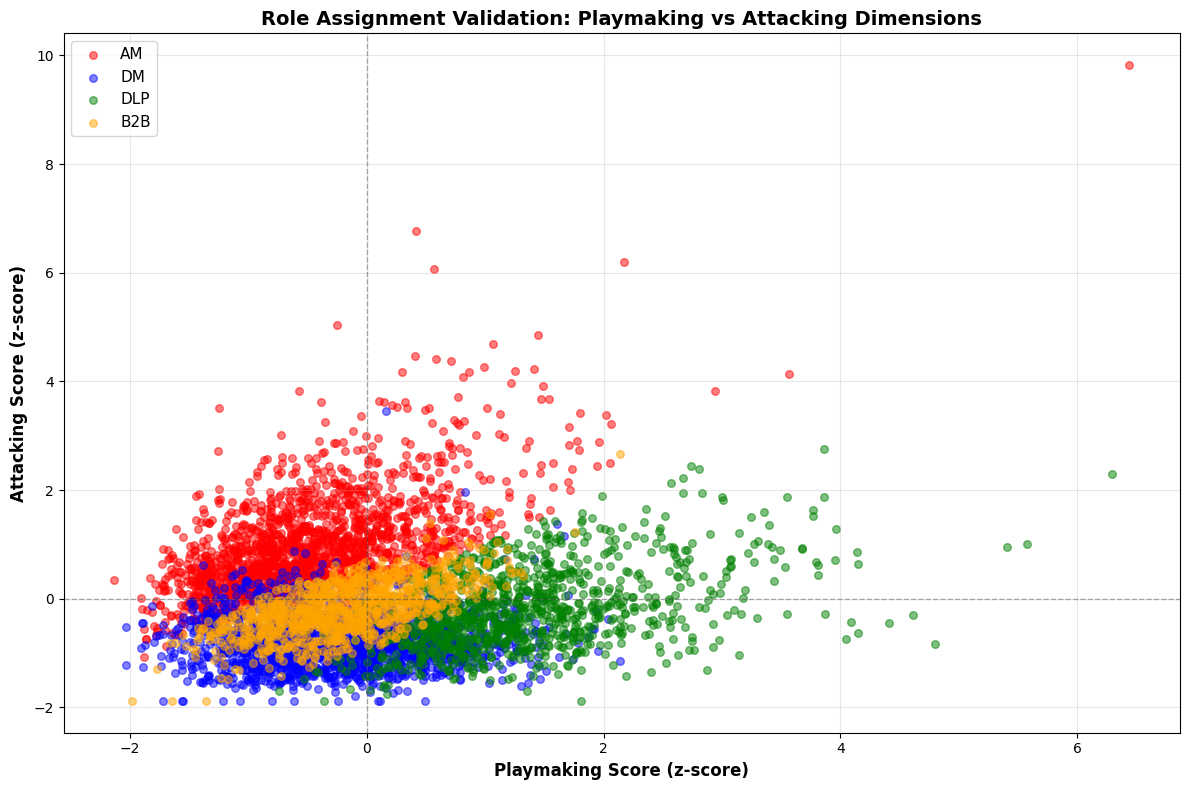

In [47]:
# Attacking vs Playmaking
fig, ax = plt.subplots(figsize=(12, 8))

colors = {'AM': 'red', 'DM': 'blue', 'DLP': 'green', 'B2B': 'orange'}
for role in ['AM', 'DM', 'DLP', 'B2B']:
    role_data = df_selected[df_selected['role'] == role]
    ax.scatter(
        role_data['playmaking_score_z'],
        role_data['attacking_score_z'],
        c=colors[role], label=role, alpha=0.5, s=30
    )

ax.axhline(0, color='black', linestyle='--', alpha=0.3, linewidth=1)
ax.axvline(0, color='black', linestyle='--', alpha=0.3, linewidth=1)
ax.set_xlabel('Playmaking Score (z-score)', fontsize=12, fontweight='bold')
ax.set_ylabel('Attacking Score (z-score)', fontsize=12, fontweight='bold')
ax.set_title('Role Assignment Validation: Playmaking vs Attacking Dimensions', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

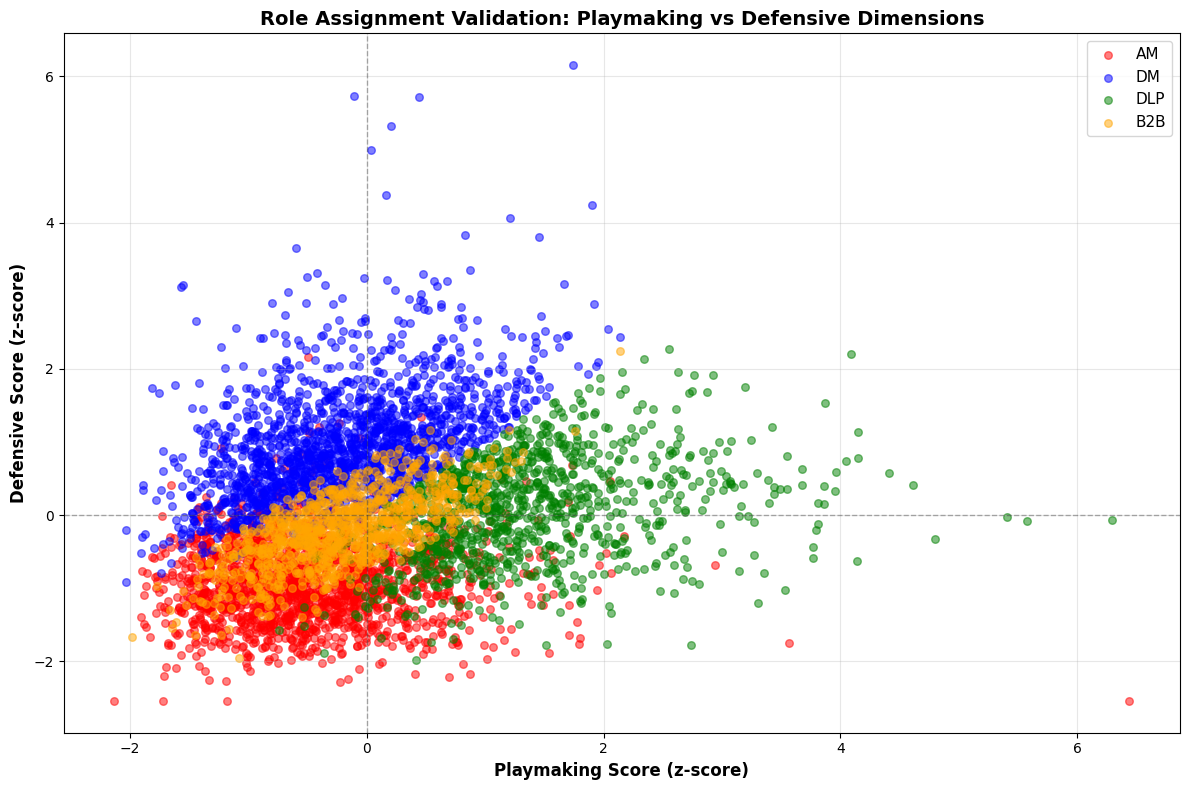

In [48]:
# Defensive vs Playmaking
fig, ax = plt.subplots(figsize=(12, 8))

colors = {'AM': 'red', 'DM': 'blue', 'DLP': 'green', 'B2B': 'orange'}
for role in ['AM', 'DM', 'DLP', 'B2B']:
    role_data = df_selected[df_selected['role'] == role]
    ax.scatter(
        role_data['playmaking_score_z'],
        role_data['defensive_score_z'],
        c=colors[role], label=role, alpha=0.5, s=30
    )

ax.axhline(0, color='black', linestyle='--', alpha=0.3, linewidth=1)
ax.axvline(0, color='black', linestyle='--', alpha=0.3, linewidth=1)
ax.set_xlabel('Playmaking Score (z-score)', fontsize=12, fontweight='bold')
ax.set_ylabel('Defensive Score (z-score)', fontsize=12, fontweight='bold')
ax.set_title('Role Assignment Validation: Playmaking vs Defensive Dimensions', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

These plots shows quite clear separation. This validates that our role assignment approach captures tactical reality.

---

### **6. Preprocessing**

#### **1. Select Features for Modeling**

**My decision after EDA:** Use 18 behavioral p90 features for training.

We will drop:
- Metadata columns (player_name, team, season, minutes_played)
- Composite scores (attacking_score, defensive_score, playmaking_score)
- Standardized scores (attacking_score_z, defensive_score_z, playmaking_score_z)
- Quality metrics (goals_p90, xG_p90, assists_p90)
- dribbles_attempted_p90 (personal style modifier across all roles)

In [49]:
# List all p90 features and behavioral metrics (18 features after EDA refinement)
selected_features = [
    'shots_p90', 
    'tackles_attempted_p90', 'shots_blocked_p90', 'passes_blocked_p90',
    'interceptions_p90', 'clearances_p90', 'touches_in_def_penalty_area_p90', 
    'progressive_passes_p90', 'passes_attempted_p90', 'progressive_pass_distance_p90',
    'key_passes_p90', 'passes_into_final_third_p90', 'passes_into_penalty_area_p90',
    'pass_completion_pct', 'shot_creating_actions_p90',  
    'progressive_carries_p90', 'carries_into_final_third_p90', 'carries_into_penalty_area_p90'  
]

# Separate features and target
X = df_selected[selected_features].copy()
y = df_selected['role'].copy()

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Features ({len(selected_features)} total):")
for i, feature in enumerate(selected_features, 1):
    print(f"{i:2}. {feature}")

Features shape: (5306, 18)
Target shape: (5306,)
Features (18 total):
 1. shots_p90
 2. tackles_attempted_p90
 3. shots_blocked_p90
 4. passes_blocked_p90
 5. interceptions_p90
 6. clearances_p90
 7. touches_in_def_penalty_area_p90
 8. progressive_passes_p90
 9. passes_attempted_p90
10. progressive_pass_distance_p90
11. key_passes_p90
12. passes_into_final_third_p90
13. passes_into_penalty_area_p90
14. pass_completion_pct
15. shot_creating_actions_p90
16. progressive_carries_p90
17. carries_into_final_third_p90
18. carries_into_penalty_area_p90


#### **2. Train-Test Split**

We will split the dataset into training and testing sets with an 80-20 split.

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=17, stratify=y
    # I choose 17 for random_state because it's my favorite number :)
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

print("\n")

print("Training set role distribution:")
print(y_train.value_counts())

print("\n")

print("Test set role distribution:")
print(y_test.value_counts())

Training set: 4244 samples
Test set: 1062 samples


Training set role distribution:
role
AM     1360
DM     1323
DLP     809
B2B     752
Name: count, dtype: int64


Test set role distribution:
role
AM     341
DM     331
DLP    202
B2B    188
Name: count, dtype: int64


#### **3. Feature Scaling**

Many machine learning algorithms (especially those based on distance or gradient descent, like logistic regression, SVM, k-NN, neural networks) are sensitive to the scale of input features. Our features (e.g., shots, passes, tackles) have different units and ranges. If not scaled, features with larger values can dominate the model and bias the results.

**We have these choice for feature scaling:**
- **Min-Max Scaling:** Scales features to a fixed range (usually 0 to 1). Sensitive to outliers.
- **Standardization (Z-score):** Transforms features to have mean 0 and standard deviation 1. Less sensitive to outliers, preserves the shape of the original distribution.
- **Robust Scaling:** Uses median and interquartile range, robust to outliers.


I choose to use `StandardScaler` (Z-score normalization) because:
  - It centers each feature around 0 and scales to unit variance, making all features comparable.
  - It works well for most algorithms and is less affected by outliers than min-max scaling.
  - Our features are mostly continuous and approximately normal after filtering, so standardization is appropriate.

In [51]:
scaler_model = StandardScaler()
X_train_scaled = scaler_model.fit_transform(X_train)
X_test_scaled = scaler_model.transform(X_test)

### **7. Model Training**

#### **1. Logistic Regression (Baseline)**

We will start with Logistic Regression as baseline model due to its simplicity, speed, and interpretability. It provides a baseline to compare against more complex models.

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import time

lr_model = LogisticRegression(max_iter=1000, random_state=17)
start_time = time.time()

lr_model.fit(X_train_scaled, y_train)
train_time = time.time() - start_time

train_acc = lr_model.score(X_train_scaled, y_train)
test_acc = lr_model.score(X_test_scaled, y_test)

cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5)


In [53]:
print("Logistic Regression Results:")
print(f"Training time: {train_time}s")
print(f"Training accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")
print(f"Cross-validation scores: {cv_scores}")
print(f"CV mean: {cv_scores.mean()} (+/- {cv_scores.std()})")

Logistic Regression Results:
Training time: 0.016991853713989258s
Training accuracy: 0.9413289349670122
Test accuracy: 0.9378531073446328
Cross-validation scores: [0.93404005 0.91990577 0.94228504 0.95053004 0.92688679]
CV mean: 0.9347295375247239 (+/- 0.010848681521784857)


#### **2. Random Forest**

Next, we will implement a Random Forest Classifier.

In [54]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=1000, random_state=17, n_jobs=-1)
start_time = time.time()

rf_model.fit(X_train_scaled, y_train)
train_time = time.time() - start_time

train_acc = rf_model.score(X_train_scaled, y_train)
test_acc = rf_model.score(X_test_scaled, y_test)

cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)

In [56]:
print("Random Forest Results:")

print(f"Training time: {train_time}s")
print(f"Training accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")
print(f"Cross-validation scores: {cv_scores}")
print(f"CV mean: {cv_scores.mean()} (+/- {cv_scores.std()})")

Random Forest Results:
Training time: 1.2201440334320068s
Training accuracy: 1.0
Test accuracy: 0.8954802259887006
Cross-validation scores: [0.88810365 0.87396938 0.88574794 0.90459364 0.88915094]
CV mean: 0.8883131097628733 (+/- 0.009778796420460013)


#### **3. XGBoost**

Finally, we will use XGBoost as advanced gradient boosting method.XGBoost often achieves state-of-the-art performance on tabular data through gradient boosting. It builds trees sequentially to correct previous errors.

In [57]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_model = XGBClassifier(n_estimators=100, random_state=17, n_jobs=-1)
start_time = time.time()

xgb_model.fit(X_train_scaled, y_train_encoded)
train_time = time.time() - start_time

train_acc = xgb_model.score(X_train_scaled, y_train_encoded)
test_acc = xgb_model.score(X_test_scaled, y_test_encoded)

cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train_encoded, cv=5)

In [58]:
print("XGBoost Results:")
print(f"Training time: {train_time}s")
print(f"Training accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")
print(f"Cross-validation scores: {cv_scores}")
print(f"CV mean: {cv_scores.mean()} (+/- {cv_scores.std()})")

XGBoost Results:
Training time: 0.5397977828979492s
Training accuracy: 1.0
Test accuracy: 0.908662900188324
Cross-validation scores: [0.91283863 0.89870436 0.9246172  0.92932862 0.90919811]
CV mean: 0.9149373847145365 (+/- 0.010969609067597811)


---

### **8. Model Evaluation**

#### **1. Model Performance Comparison**

In [59]:
from sklearn.metrics import accuracy_score, f1_score

y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)


results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Test Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test_encoded, y_pred_xgb)
    ],
    'F1-Score (Weighted)': [
        f1_score(y_test, y_pred_lr, average='weighted'),
        f1_score(y_test, y_pred_rf, average='weighted'),
        f1_score(y_test_encoded, y_pred_xgb, average='weighted')
    ]
})

print("Model Comparison:")
print(results.to_string(index=False))

Model Comparison:
              Model  Test Accuracy  F1-Score (Weighted)
Logistic Regression       0.937853             0.936527
      Random Forest       0.895480             0.894190
            XGBoost       0.908663             0.907813


**Model Comparison**

- Logistic Regression achieves the highest test accuracy (93.8%) and weighted F1-score (93.7%), indicating it generalizes best to unseen data.
- XGBoost performs well with 90.9% test accuracy and 90.8% F1-score, slightly better than Random Forest.
- Random Forest has lower test accuracy (89.5%) and F1-score (89.4%), and shows clear signs of overfitting (training accuracy 100% vs test accuracy 89.5%).
- Overall, Logistic Regression is the most reliable model for this classification task.

#### **2. Confusion Matrix (XGBoost)**

Let's examine where XGBoost makes mistakes. We use XGBoost for the confusion matrix visualization because it provides better feature importance interpretability, even though Logistic Regression achieved slightly higher accuracy.

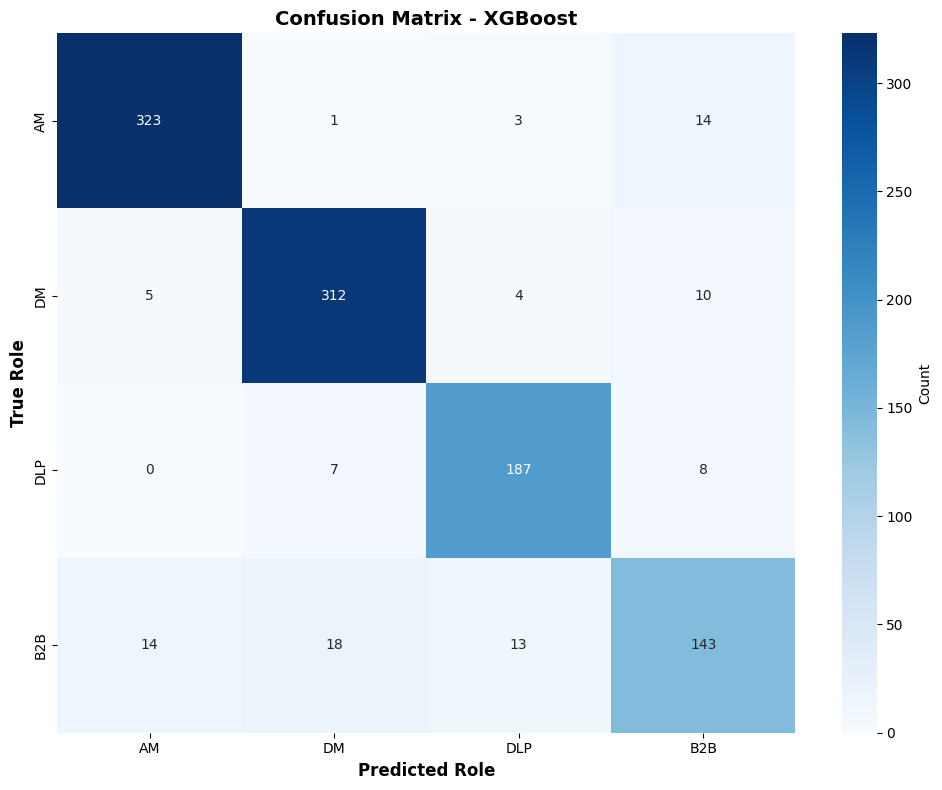

In [60]:
from sklearn.metrics import confusion_matrix

y_test_labels = label_encoder.inverse_transform(y_test_encoded)
y_pred_labels = label_encoder.inverse_transform(y_pred_xgb)

cm = confusion_matrix(y_test_labels, y_pred_labels, labels=['AM', 'DM', 'DLP', 'B2B'])

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['AM', 'DM', 'DLP', 'B2B'],
            yticklabels=['AM', 'DM', 'DLP', 'B2B'],
            ax=ax, cbar_kws={'label': 'Count'})
ax.set_xlabel('Predicted Role', fontsize=12, fontweight='bold')
ax.set_ylabel('True Role', fontsize=12, fontweight='bold')
ax.set_title('Confusion Matrix - XGBoost', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#### **3. Feature Importance (XGBoost)**

Which features are most important for role classification?

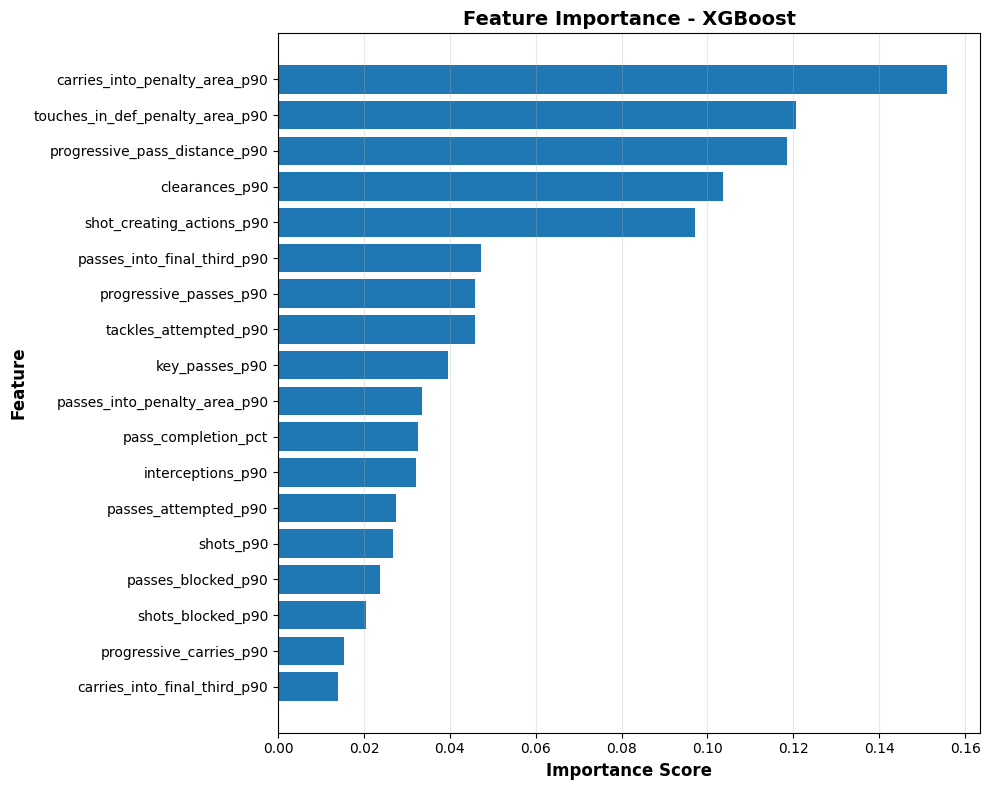

In [61]:
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(range(len(feature_importance)), feature_importance['Importance'])
ax.set_yticks(range(len(feature_importance)))
ax.set_yticklabels(feature_importance['Feature'])
ax.invert_yaxis()
ax.set_xlabel('Importance Score', fontsize=12, fontweight='bold')
ax.set_ylabel('Feature', fontsize=12, fontweight='bold')
ax.set_title('Feature Importance - XGBoost', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

---

## **6. Conclusion**

#### **Summary of Findings**

This project have demonstrated that tactical roles of football midfielders can be identified from match statistics using supervised machine learning. Key findings include:

1. **Role Assignment Approach**: Using 3 composite scores (Attacking, Defensive, Playmaking) based on relative strengths produced a balanced distribution of roles: AM (27.1%), DM (26.9%), DLP (24.5%), and B2B (21.5%).

2. **Model Performance**: Logistic Regression achieved the best performance with 93.8% test accuracy and 93.7% weighted F1-score. XGBoost performed well (90.9% accuracy), while Random Forest showed signs of overfitting (100% training vs 89.5% test accuracy).

3. **Key Features**: The most important features for role classification (from XGBoost feature importance) were related to:
   - Shooting behavior (shots per 90) - distinguishes attacking roles
   - Pass completion percentage - indicates playing style and role
   - Clearances per 90 - identifies defensive roles
   - Tackles attempted per 90 - defensive contribution
   - Interceptions per 90 - defensive positioning

4. **Misclassification Patterns**: The confusion matrix shows that B2B is the hardest role to classify, as it has characteristics of multiple roles. AM and DM are classified most accurately due to their distinct behavioral profiles.

#### **Limitations**

Several limitations should be noted:

1. **Role Assignment Subjectivity**: The roles were assigned algorithmically based on composite scores, not ground-truth labels from coaches or analysts. This means we're learning patterns from our own assignment logic rather than verified tactical roles.

2. **Positional Overlap**: In real football, players often switch roles within matches or play hybrid positions. Our static classification doesn't capture this tactical fluidity.

3. **Team Context Ignored**: Playing style is influenced by team tactics, league quality, and opponent strength. A midfielder in a defensive team may have different statistics than the same player in an attacking team.

4. **Feature Coverage**: While we have 22 behavioral features, some tactical aspects (pressing intensity, positioning discipline, position heatmap) are not captured in the dataset.

5. **Temporal Consistency**: We treat each player-season as independent, but players may change roles across seasons or within a season.

#### **Future Work**

Several directions could improve this analysis:

1. **Ground-Truth Labels**: Collaborate with football analysts to obtain manually labeled roles for a subset of players, then use semi-supervised learning or validate current assignments.

2. **Temporal Modeling**: Use sequence models (LSTM, Transformer) to track how players' roles evolve across seasons and capture within-season role changes.

3. **Context Features**: Incorporate team-level features (formation, playing style, league strength) and opponent features to account for contextual factors.

4. **Hierarchical Classification**: First classify broad categories (Defensive vs Attacking), then sub-classify within each category for more granular role identification.

5. **Clustering Validation**: Use unsupervised clustering (K-Means, DBSCAN) to discover natural player groupings and compare with current role assignments.

6. **Position-Specific Models**: Train separate models for different positional zones (central midfield vs wide midfield) as their behavioral patterns differ.

7. **Multi-Label Classification**: Allow players to have multiple role tags (e.g., "AM + B2B") to capture hybrid roles more accurately.

#### **Final Remarks**

This project demonstrates that machine learning can effectively identify tactical patterns in football data. The 93.8% accuracy achieved by Logistic Regression suggests that midfielder roles have distinct statistical signatures that can be learned from match data.

The approach of using composite scores for role assignment, followed by supervised learning with granular features, proved effective. The clear separation of roles in visualizations and strong model performance validate the methodology.

For practical applications, this model could assist:
- **Recruitment analysts** in identifying players who fit specific tactical roles
- **Coaches** in understanding player strengths and optimal positioning
- **Player development** by tracking role evolution over time
- **Match analysis** by comparing expected vs actual role behavior

The project successfully achieved its objective of demonstrating that midfielder roles can be recognized from observable match statistics, providing a foundation for more sophisticated tactical analysis systems.

---

**End of Notebook**

Thanks, 

**Khoa Cao**

In [62]:
!pip freeze > requirements.txt